In [27]:
%load_ext autoreload
%autoreload 2
import os
from os.path import join as oj
import pickle as pkl
from typing import Dict, Any

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 250

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')
from experiments.notebooks import viz
from experiments.data_util import get_clean_dataset
from experiments.config.datasets import DATASETS
print('num_datasets', len(DATASETS))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
num_datasets 8


In [28]:
# run comparison aggregations
!python "../01_aggregate_comparisons.py"

path /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/recidivism/train-test
path /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/credit/train-test
path /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/juvenile/train-test
path /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/readmission/train-test
path /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/breast-cancer/train-test
path /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/credit-g/train-test
path /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/haberman/train-test
path /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/heart/train-test


In [29]:
g.keys()

Index(['n_estimators', 'alpha', 'heart_rocauc_train',
       'heart_avg_precision_train', 'heart_best_accuracy_train',
       'heart_rocauc_test', 'heart_avg_precision_test',
       'heart_best_accuracy_test', 'heart_complexity', 'heart_time',
       'mean_rocauc', 'mean_avg_precision', 'mean_best_accuracy',
       'mean_complexity', 'mean_time', 'max_depth', 'max_rules', 'model'],
      dtype='object')

# curves

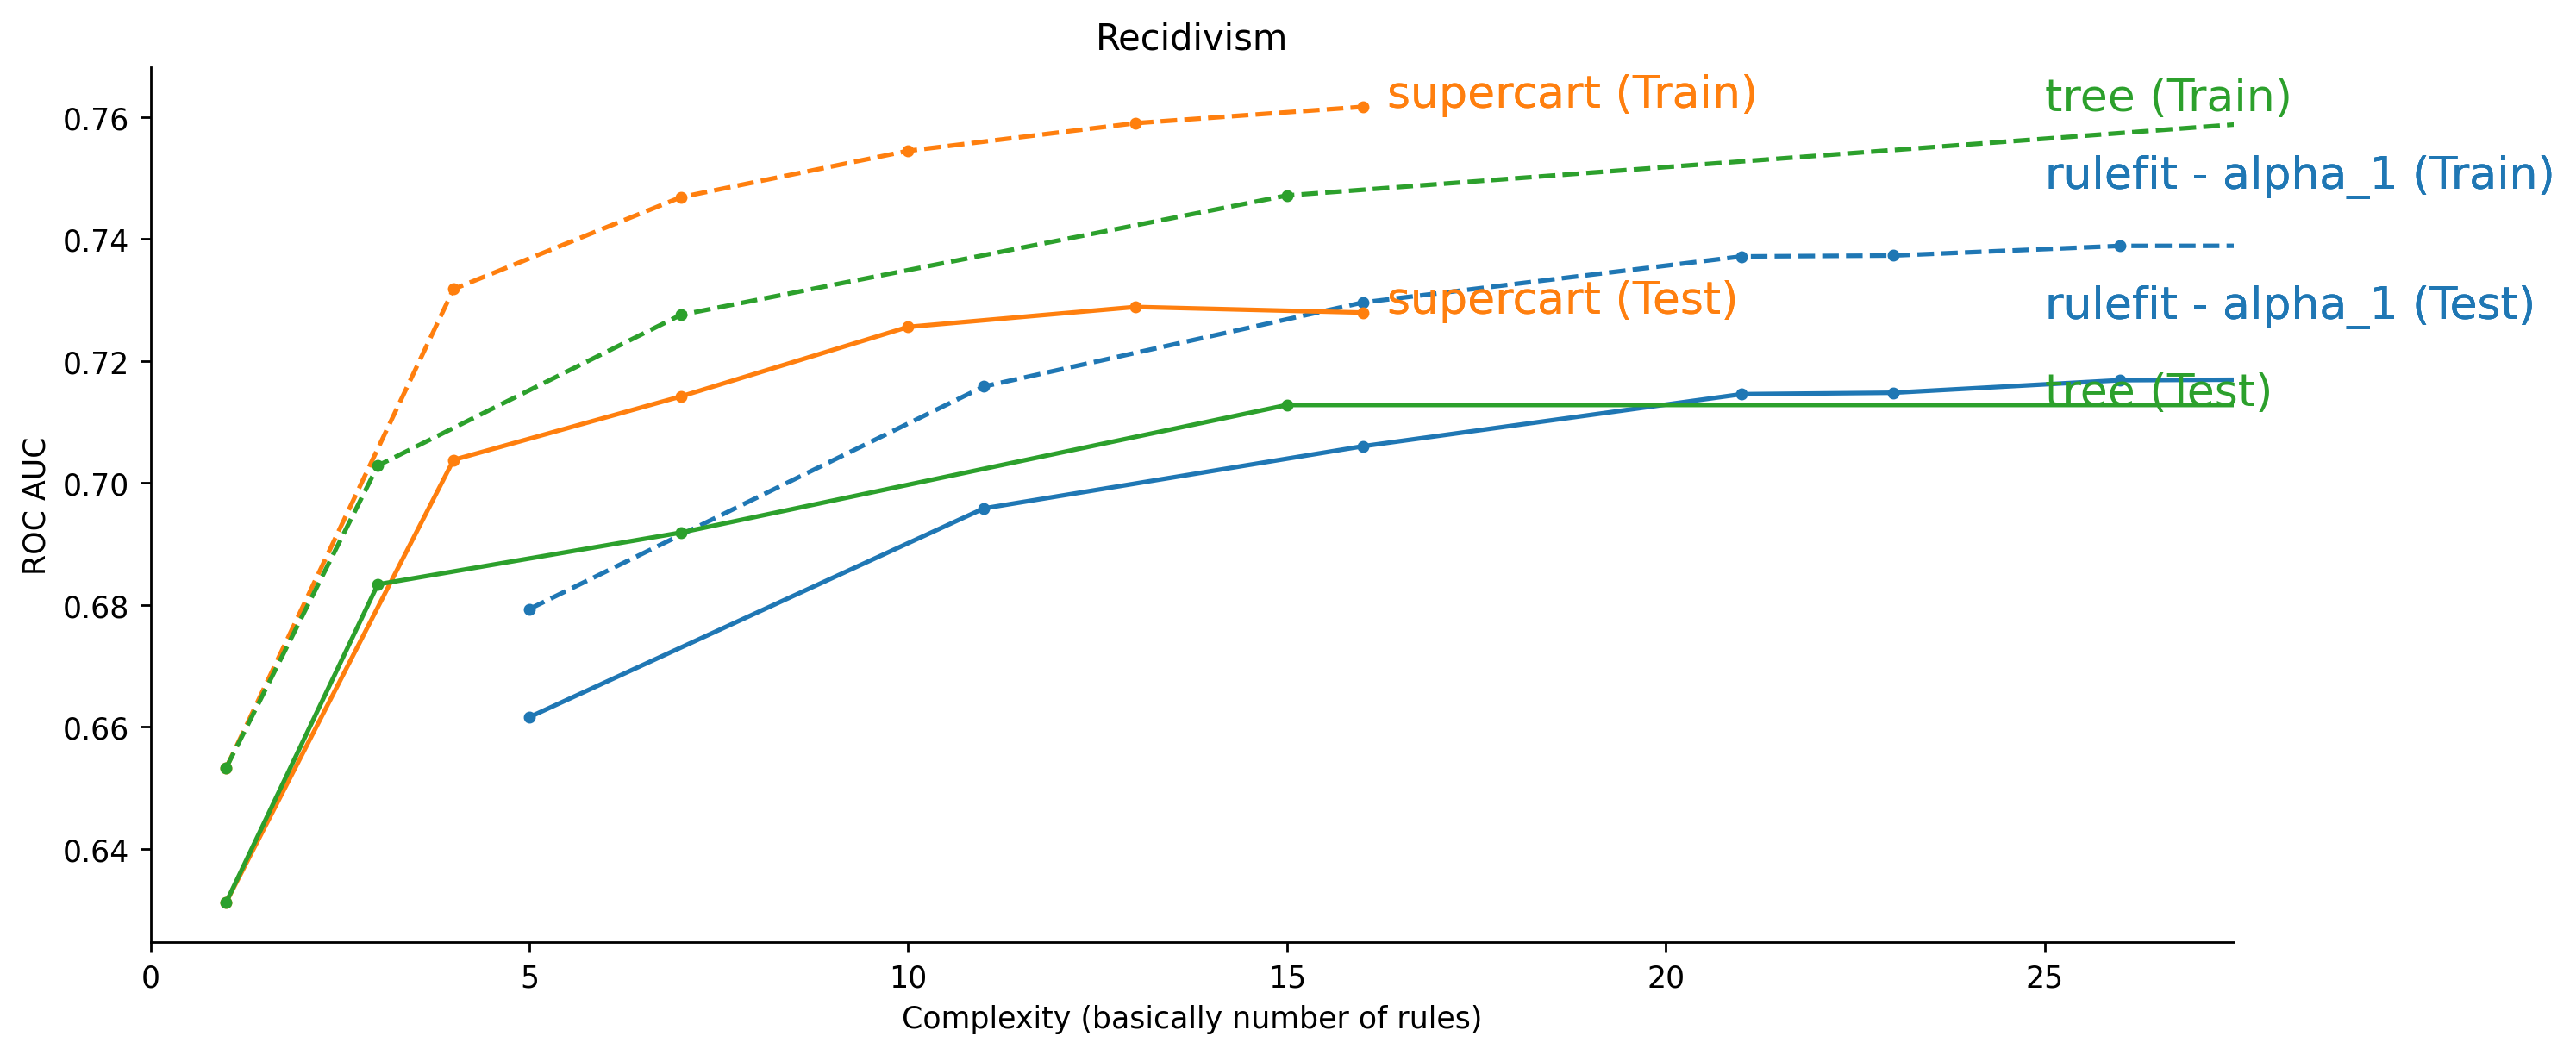

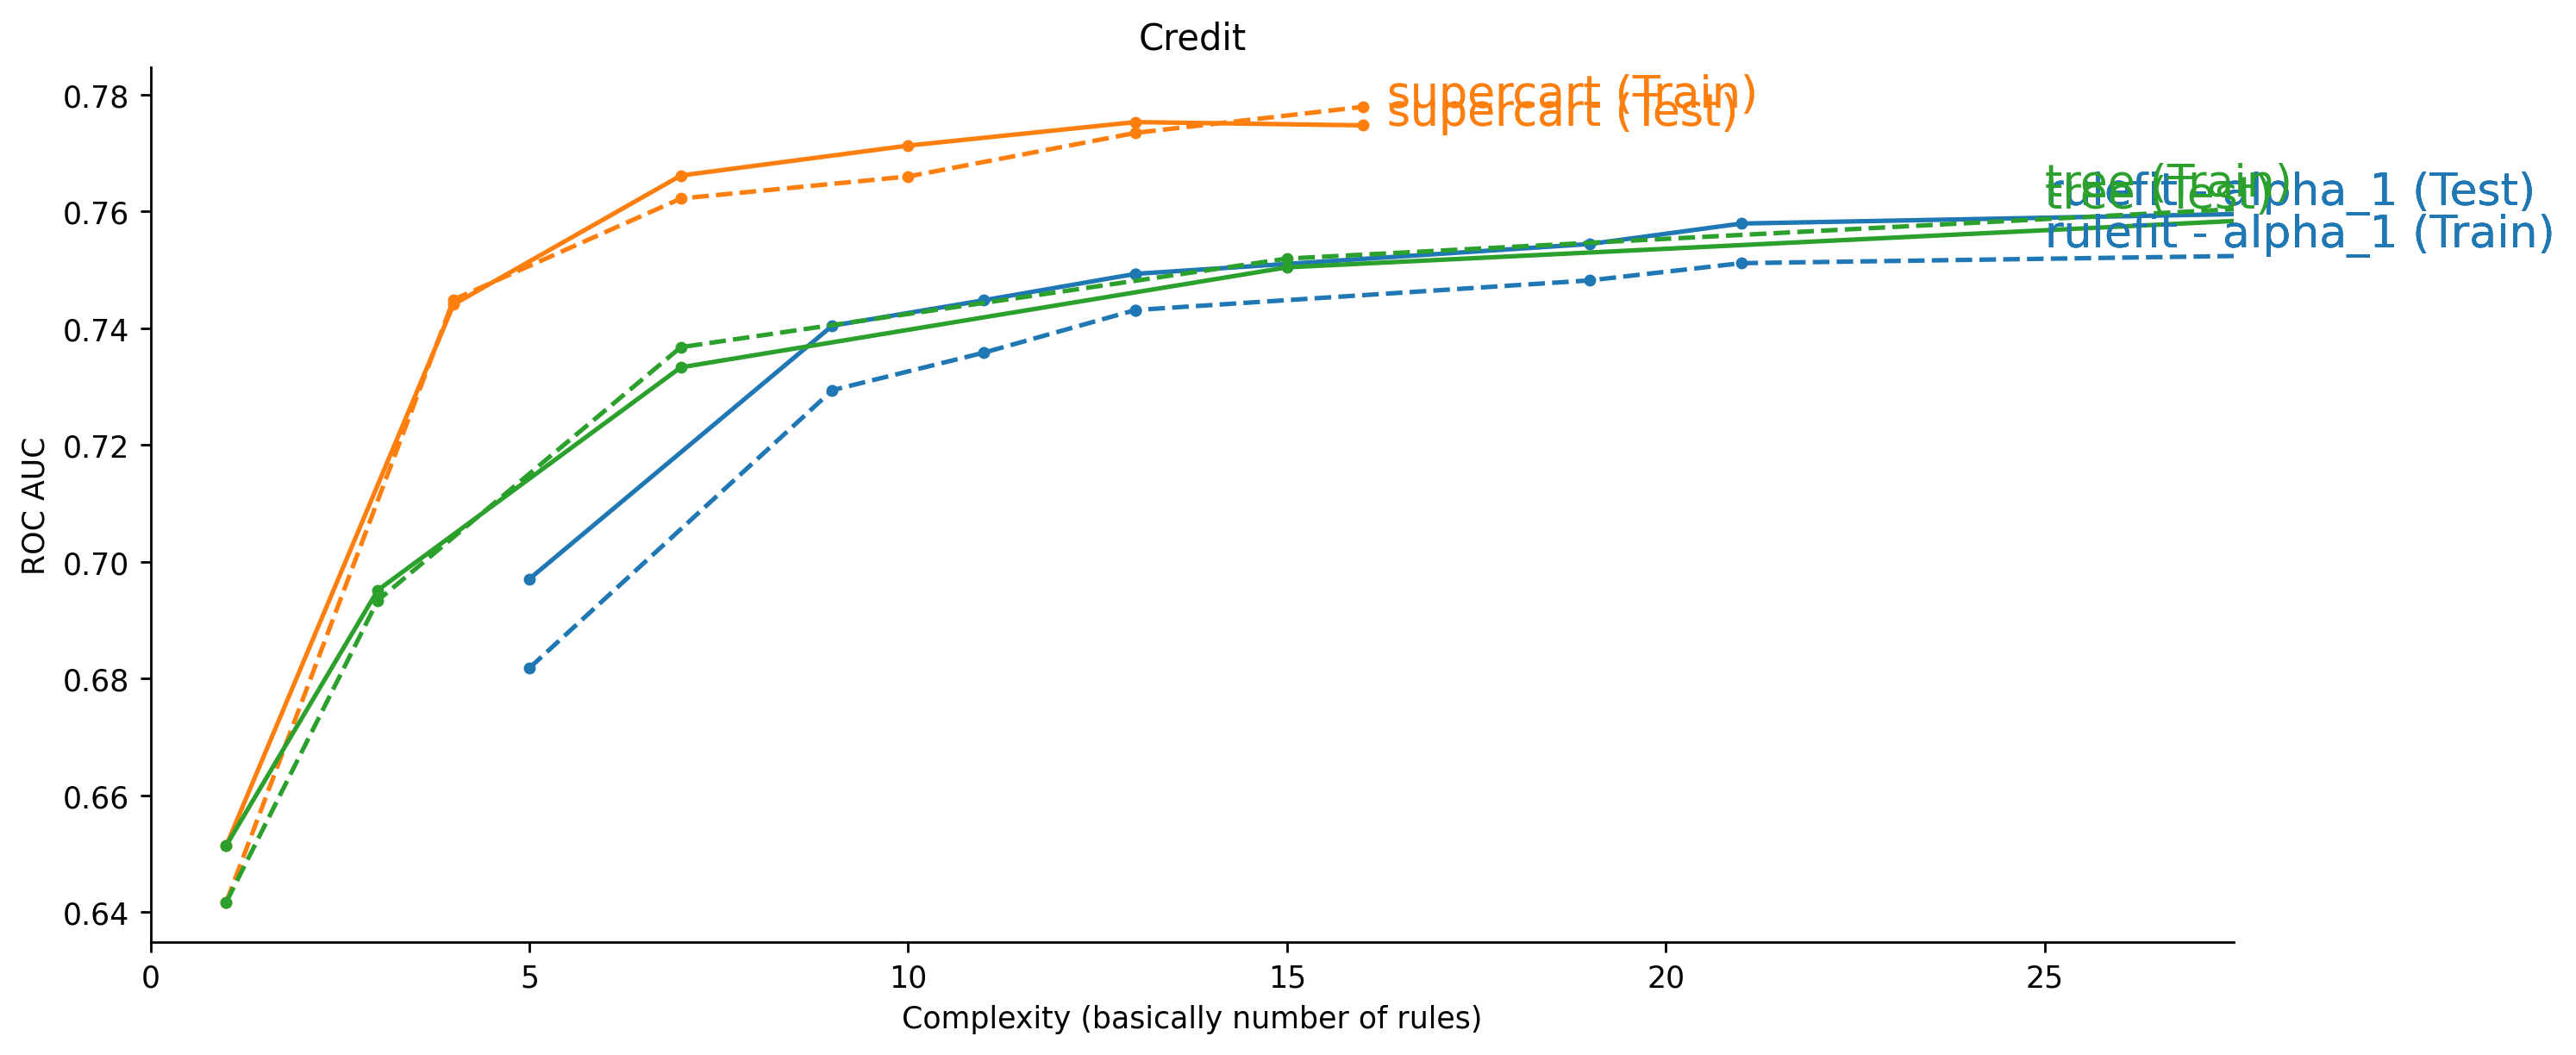

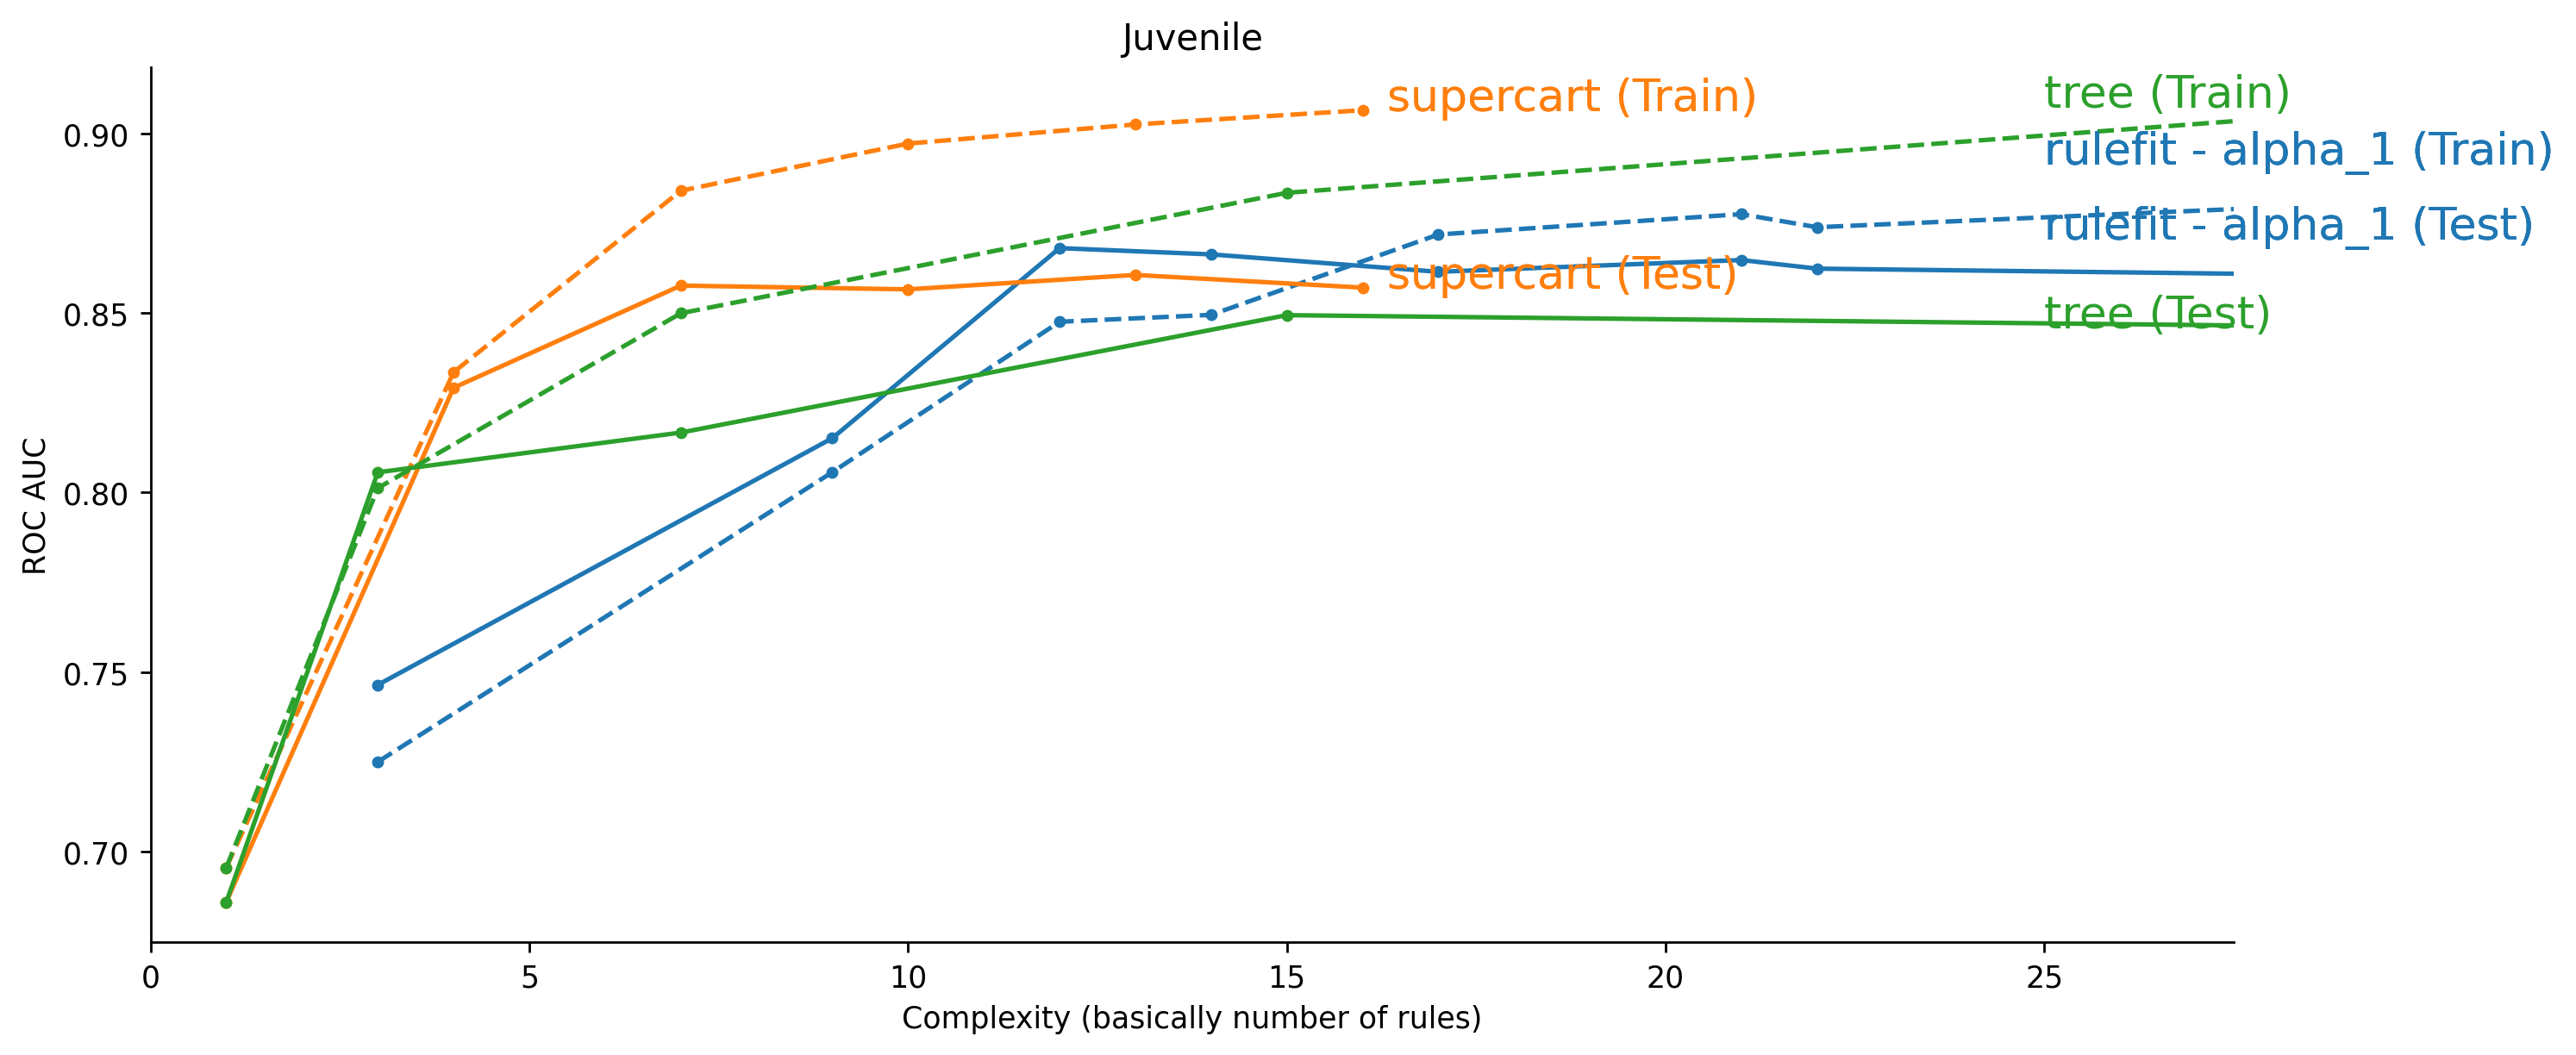

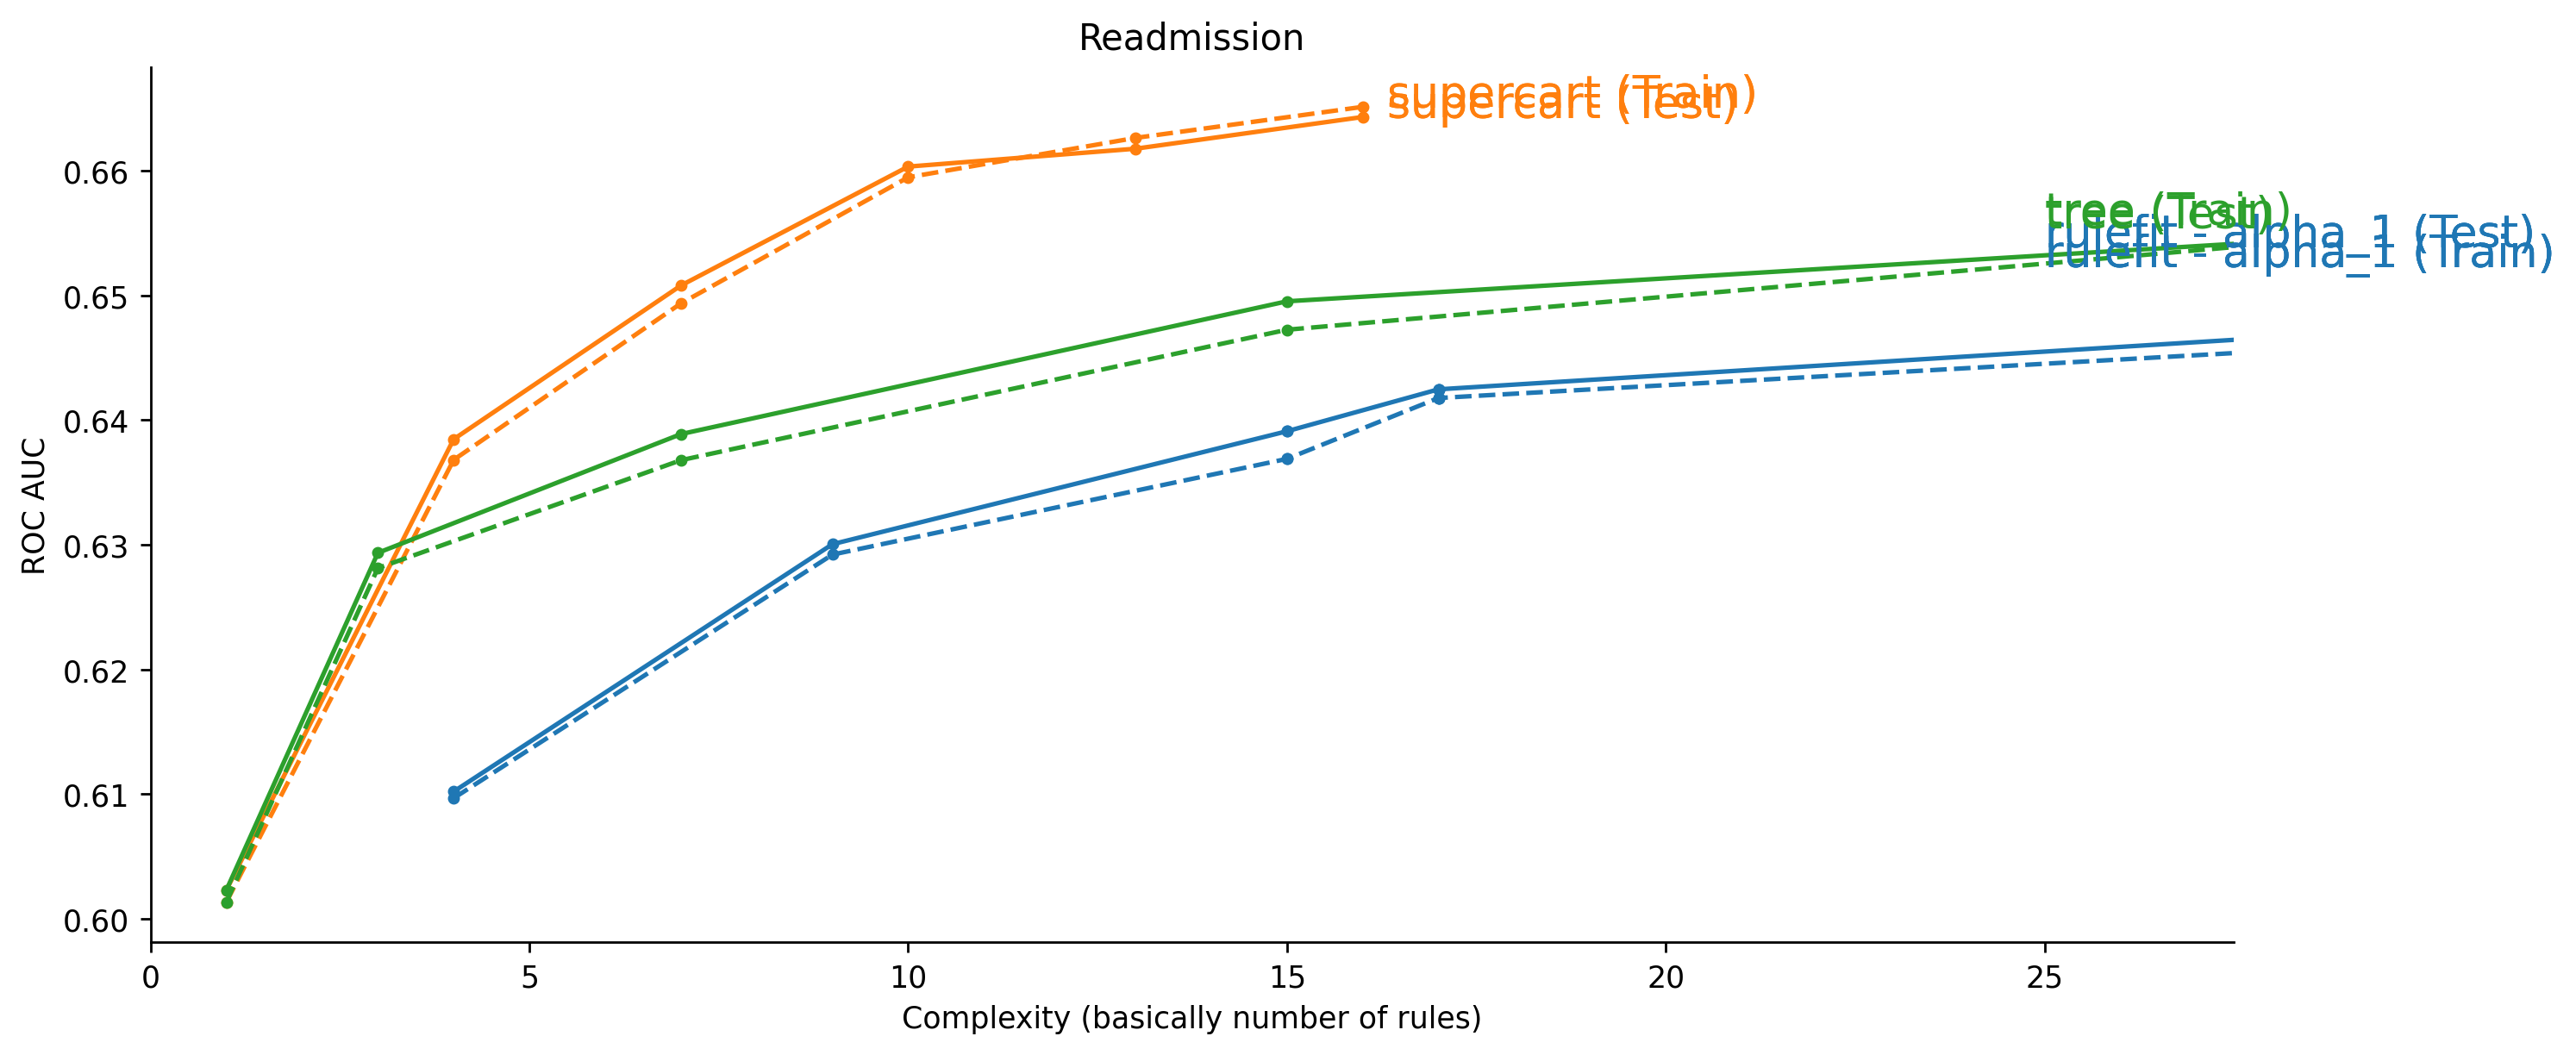

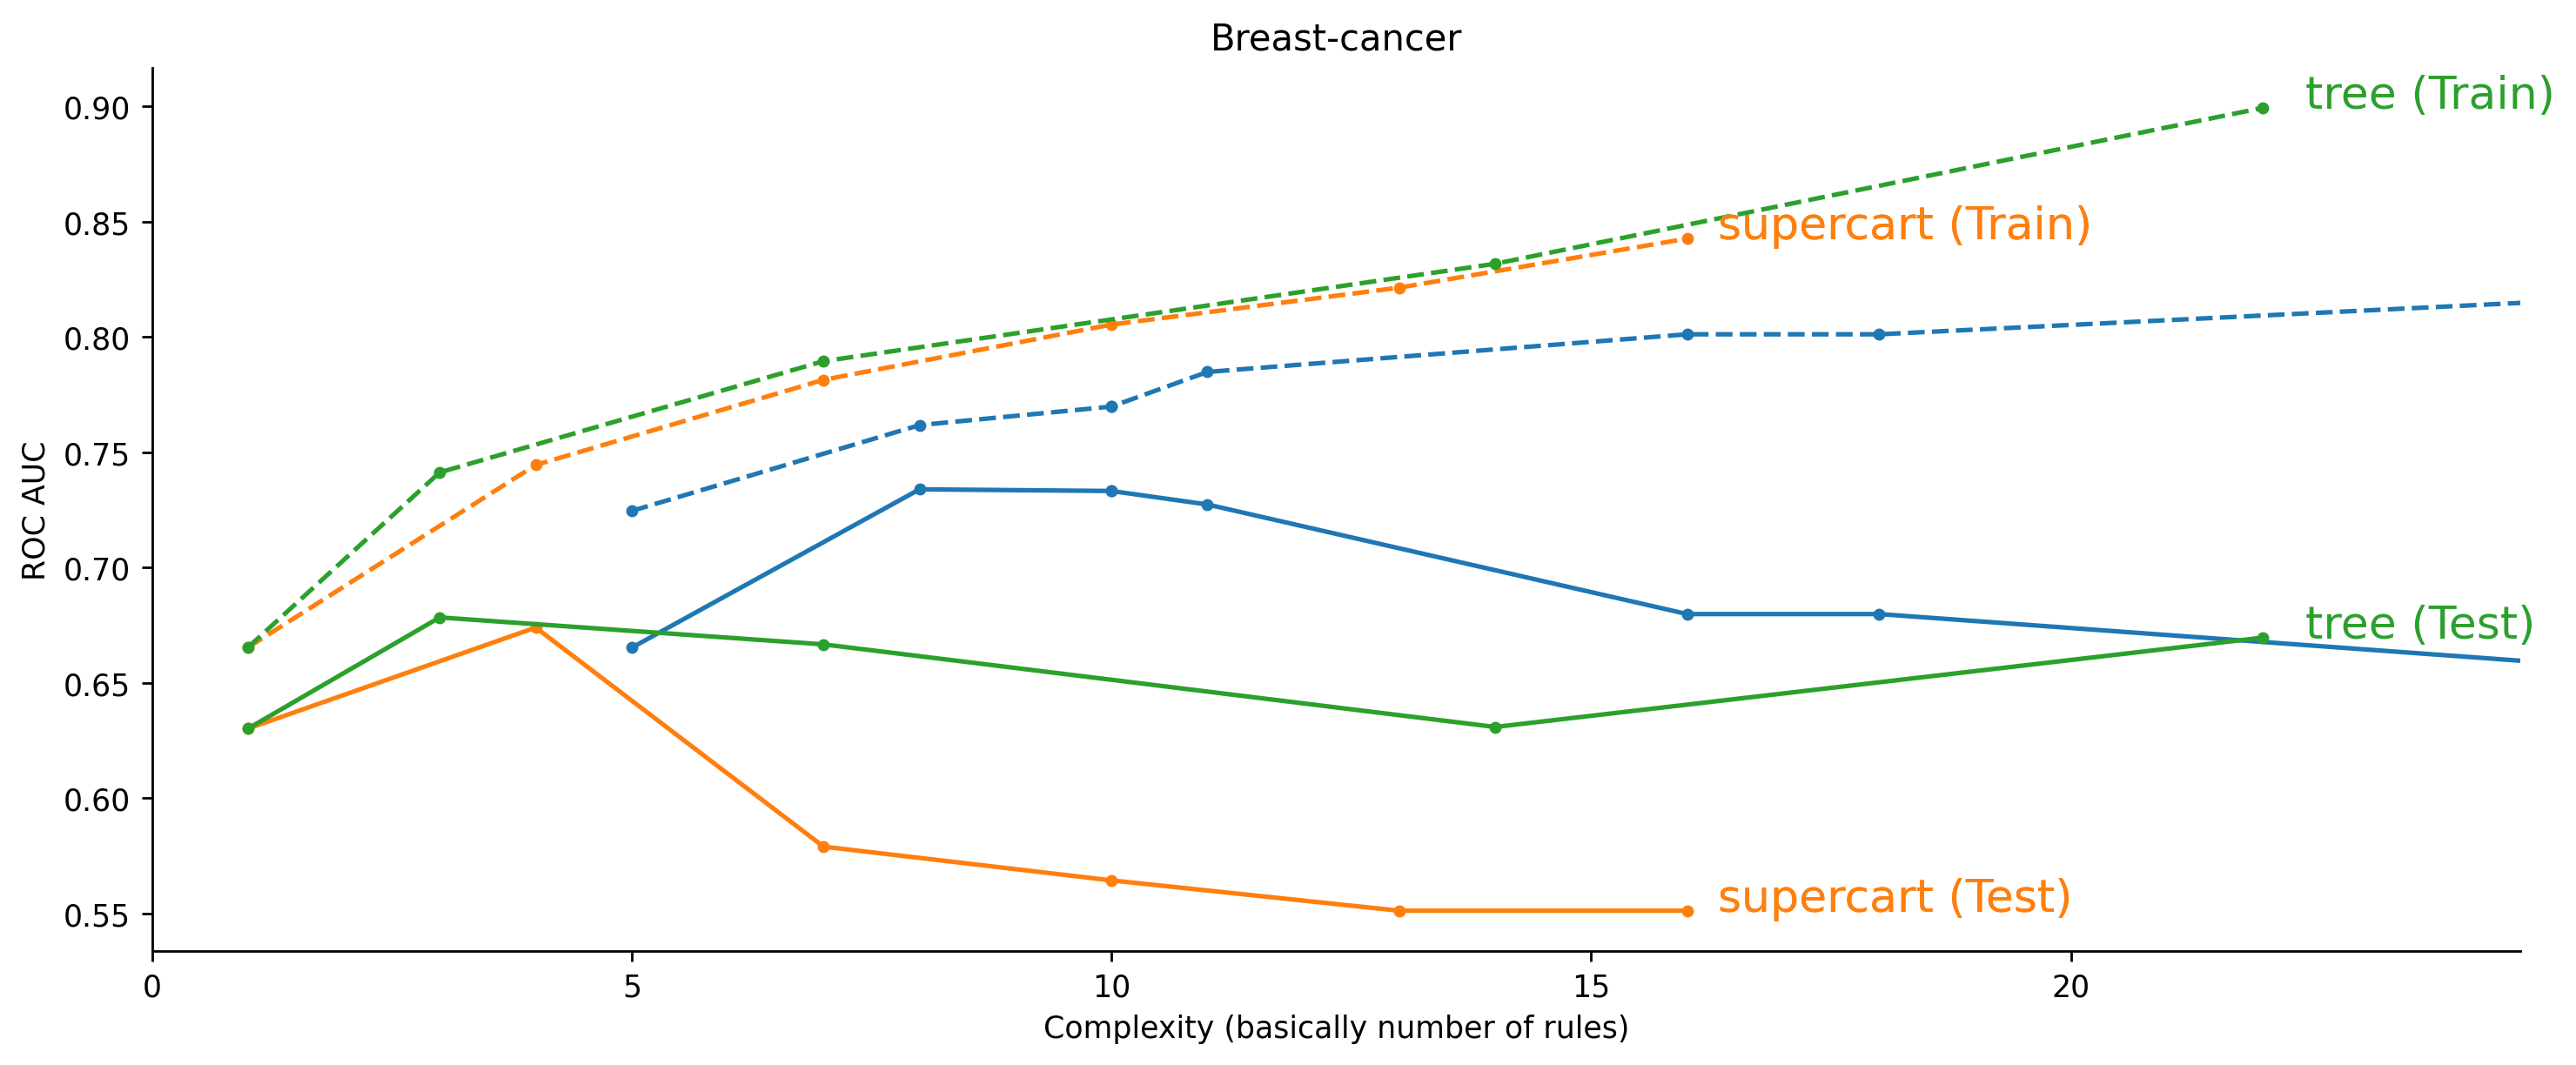

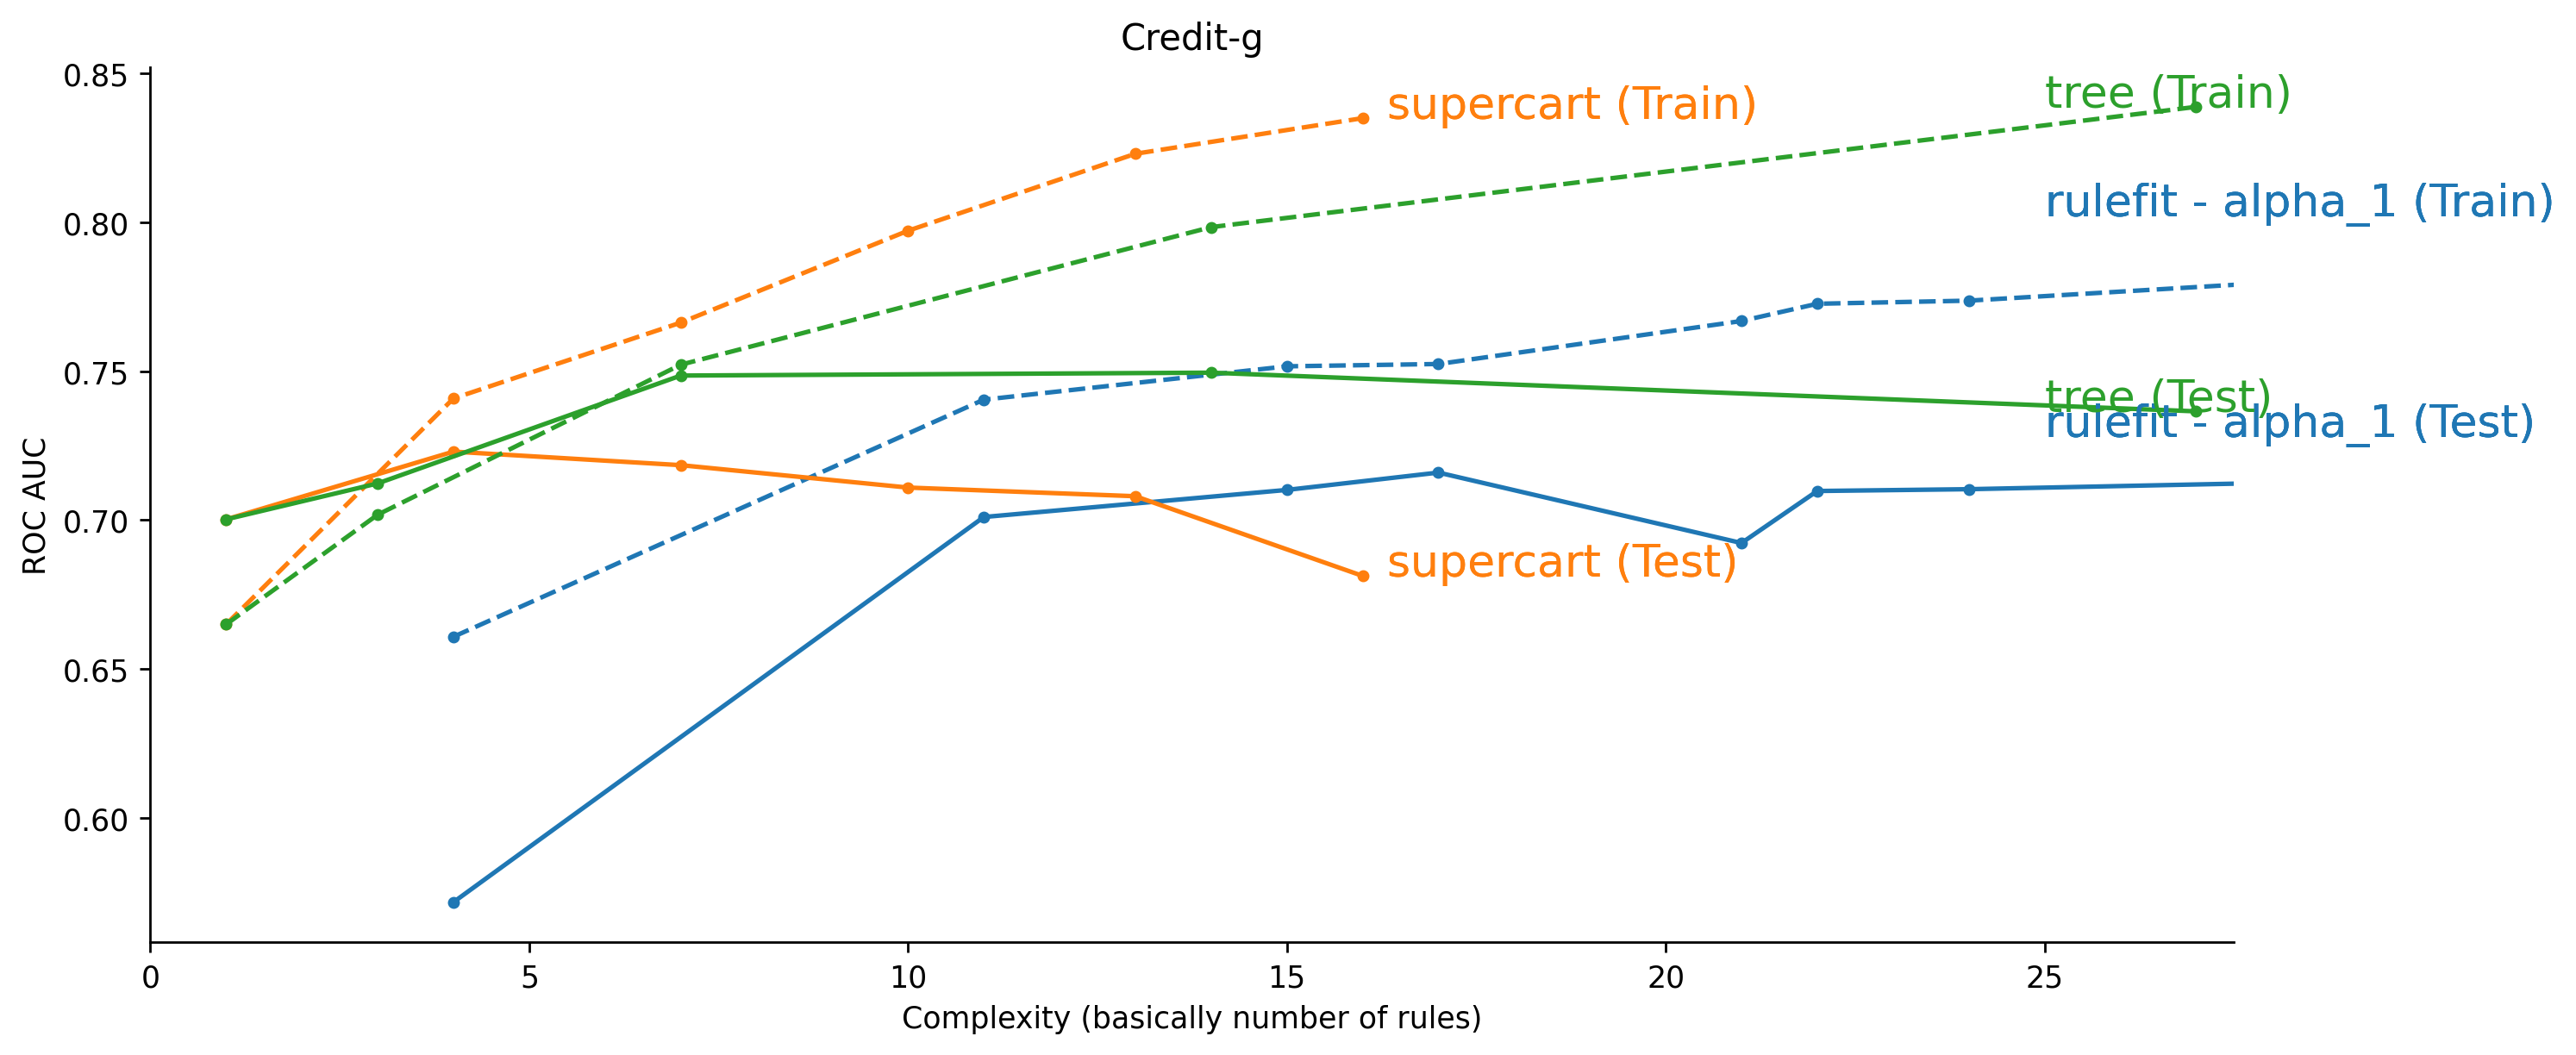

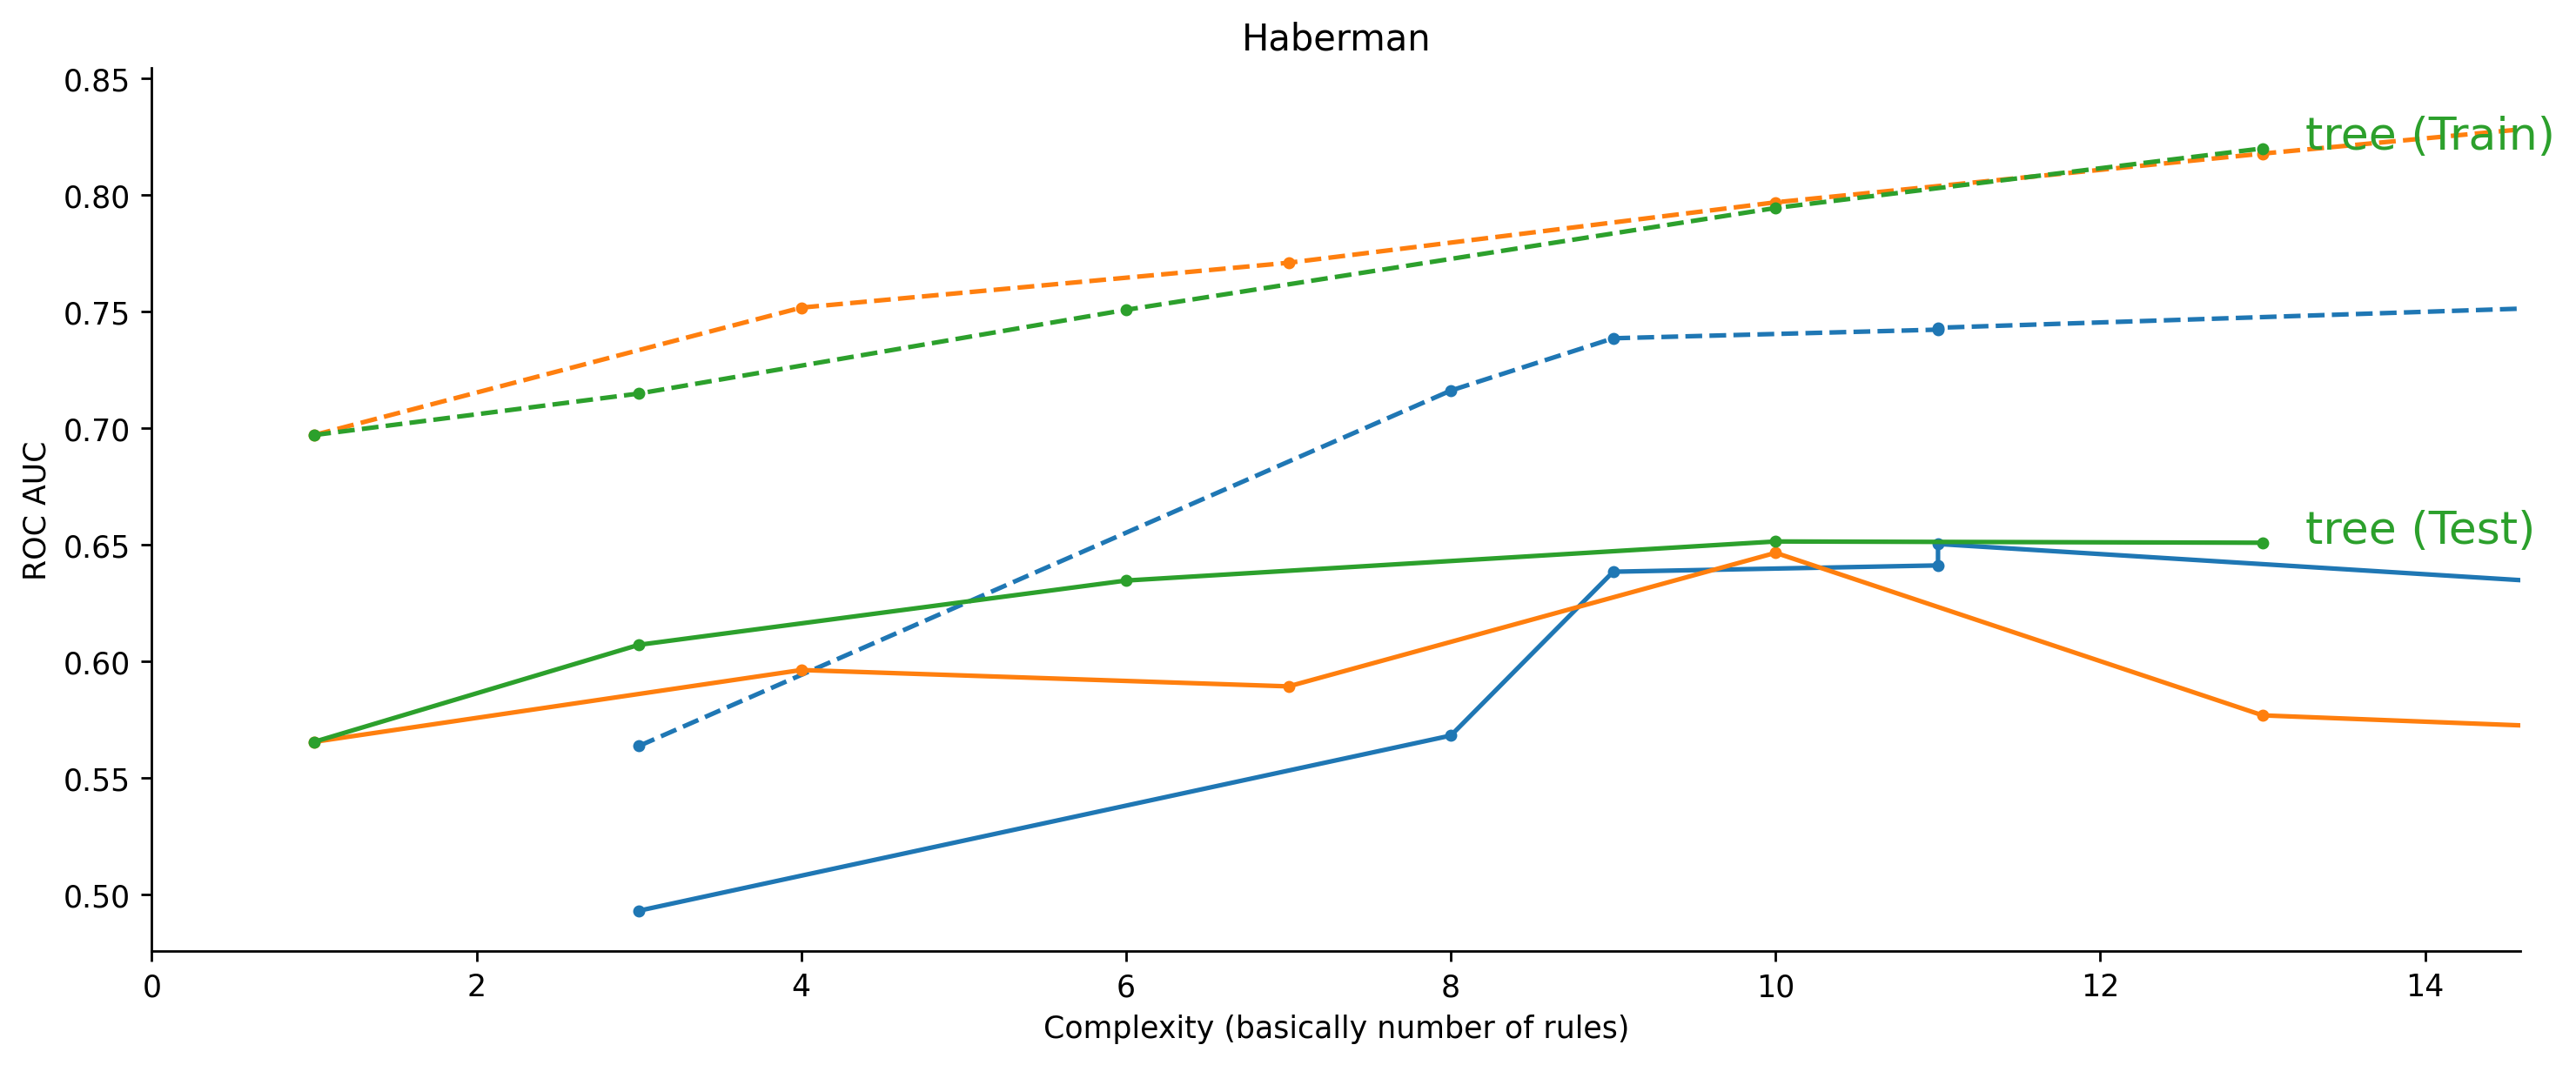

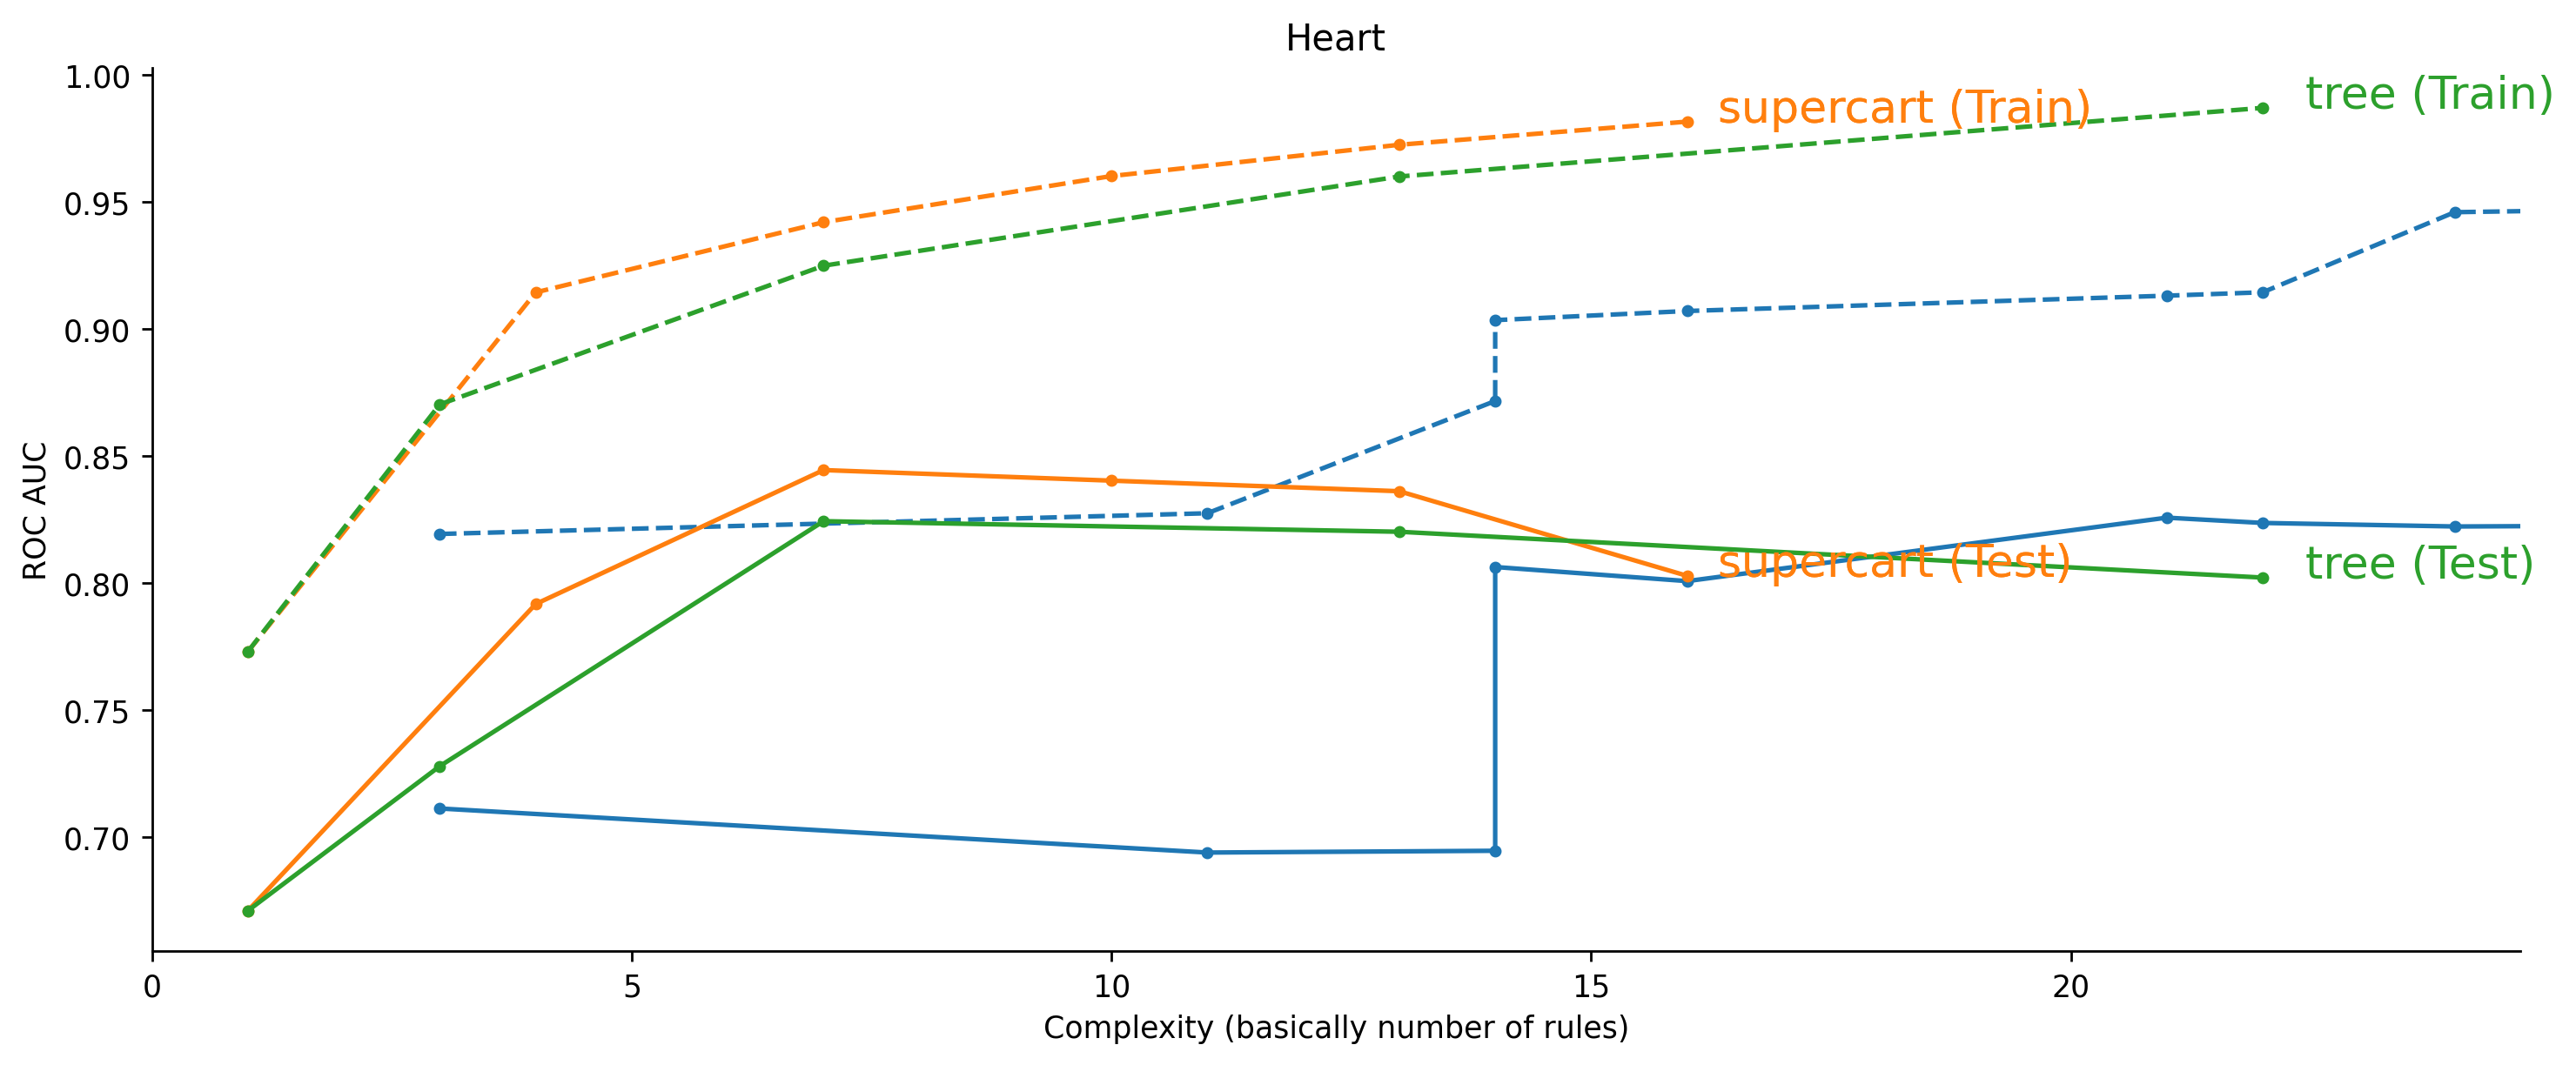

In [34]:
metric = 'rocauc'
for dset in DATASETS:
    dset_name = dset[0]
    pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
    df = pkl.load(open(pkl_file, 'rb'))['df']
    df['model'] = df.index
    
#     print(list(df.keys()))
    plt.figure(figsize=(12, 5))
    R, C = 1, 2
    for i, (name, g) in enumerate(df.groupby('model')):
        args = np.argsort(g[f'{dset_name}_complexity'])
        plt.title(dset_name.capitalize())
        kwargs = dict(color=colors[i])
        plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs, label=name + ' (Test)')
        plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs, label=name + ' (Train)')
        plt.xlabel('Complexity (basically number of rules)')
        plt.xlim((0, 25))
        plt.ylabel('ROC AUC')
        dvu.line_legend()

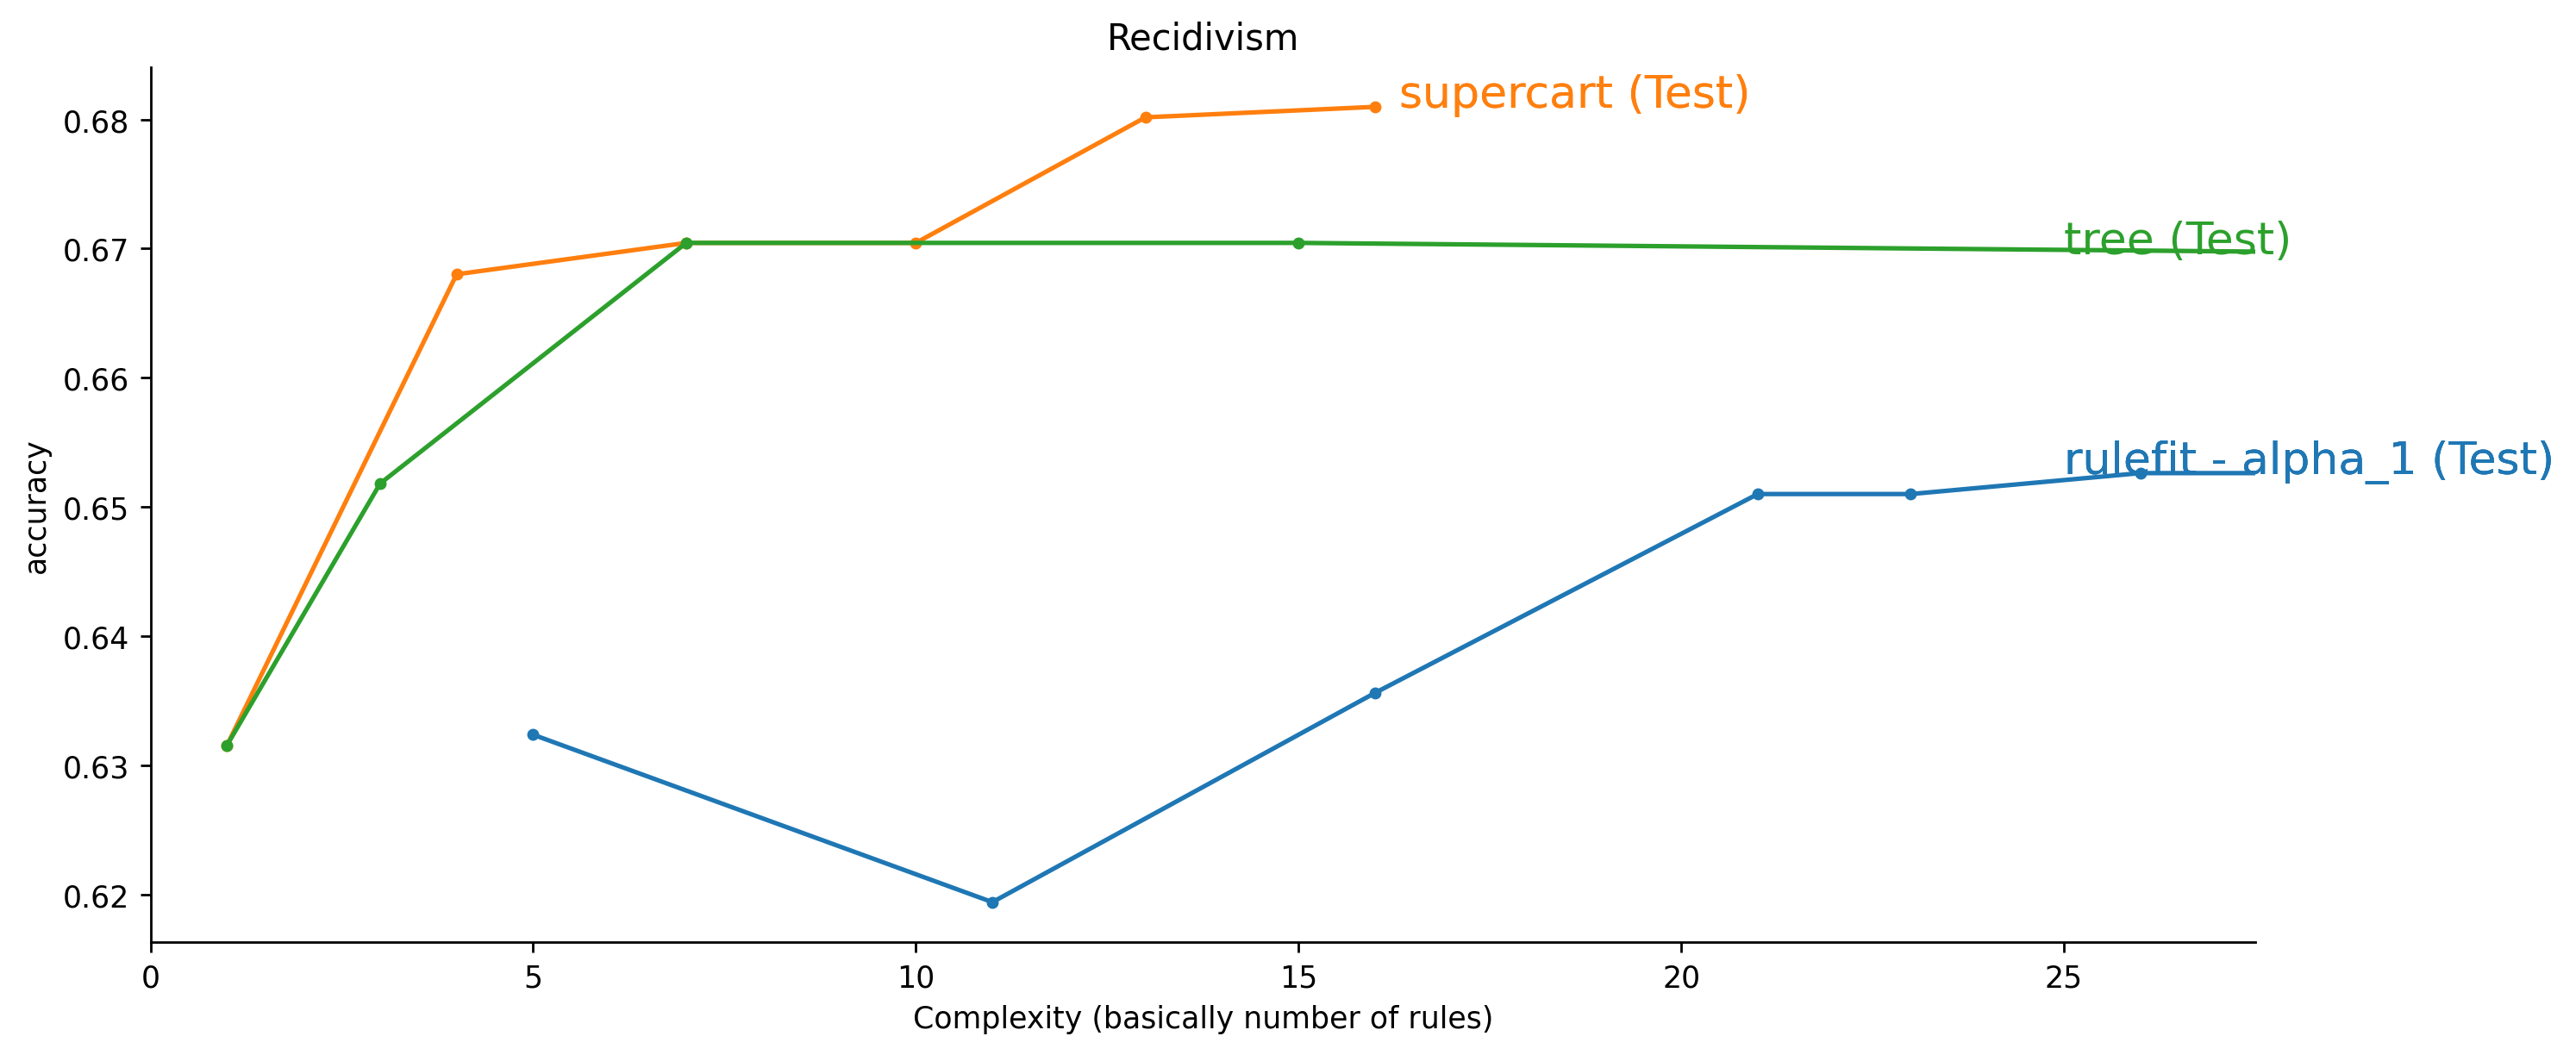

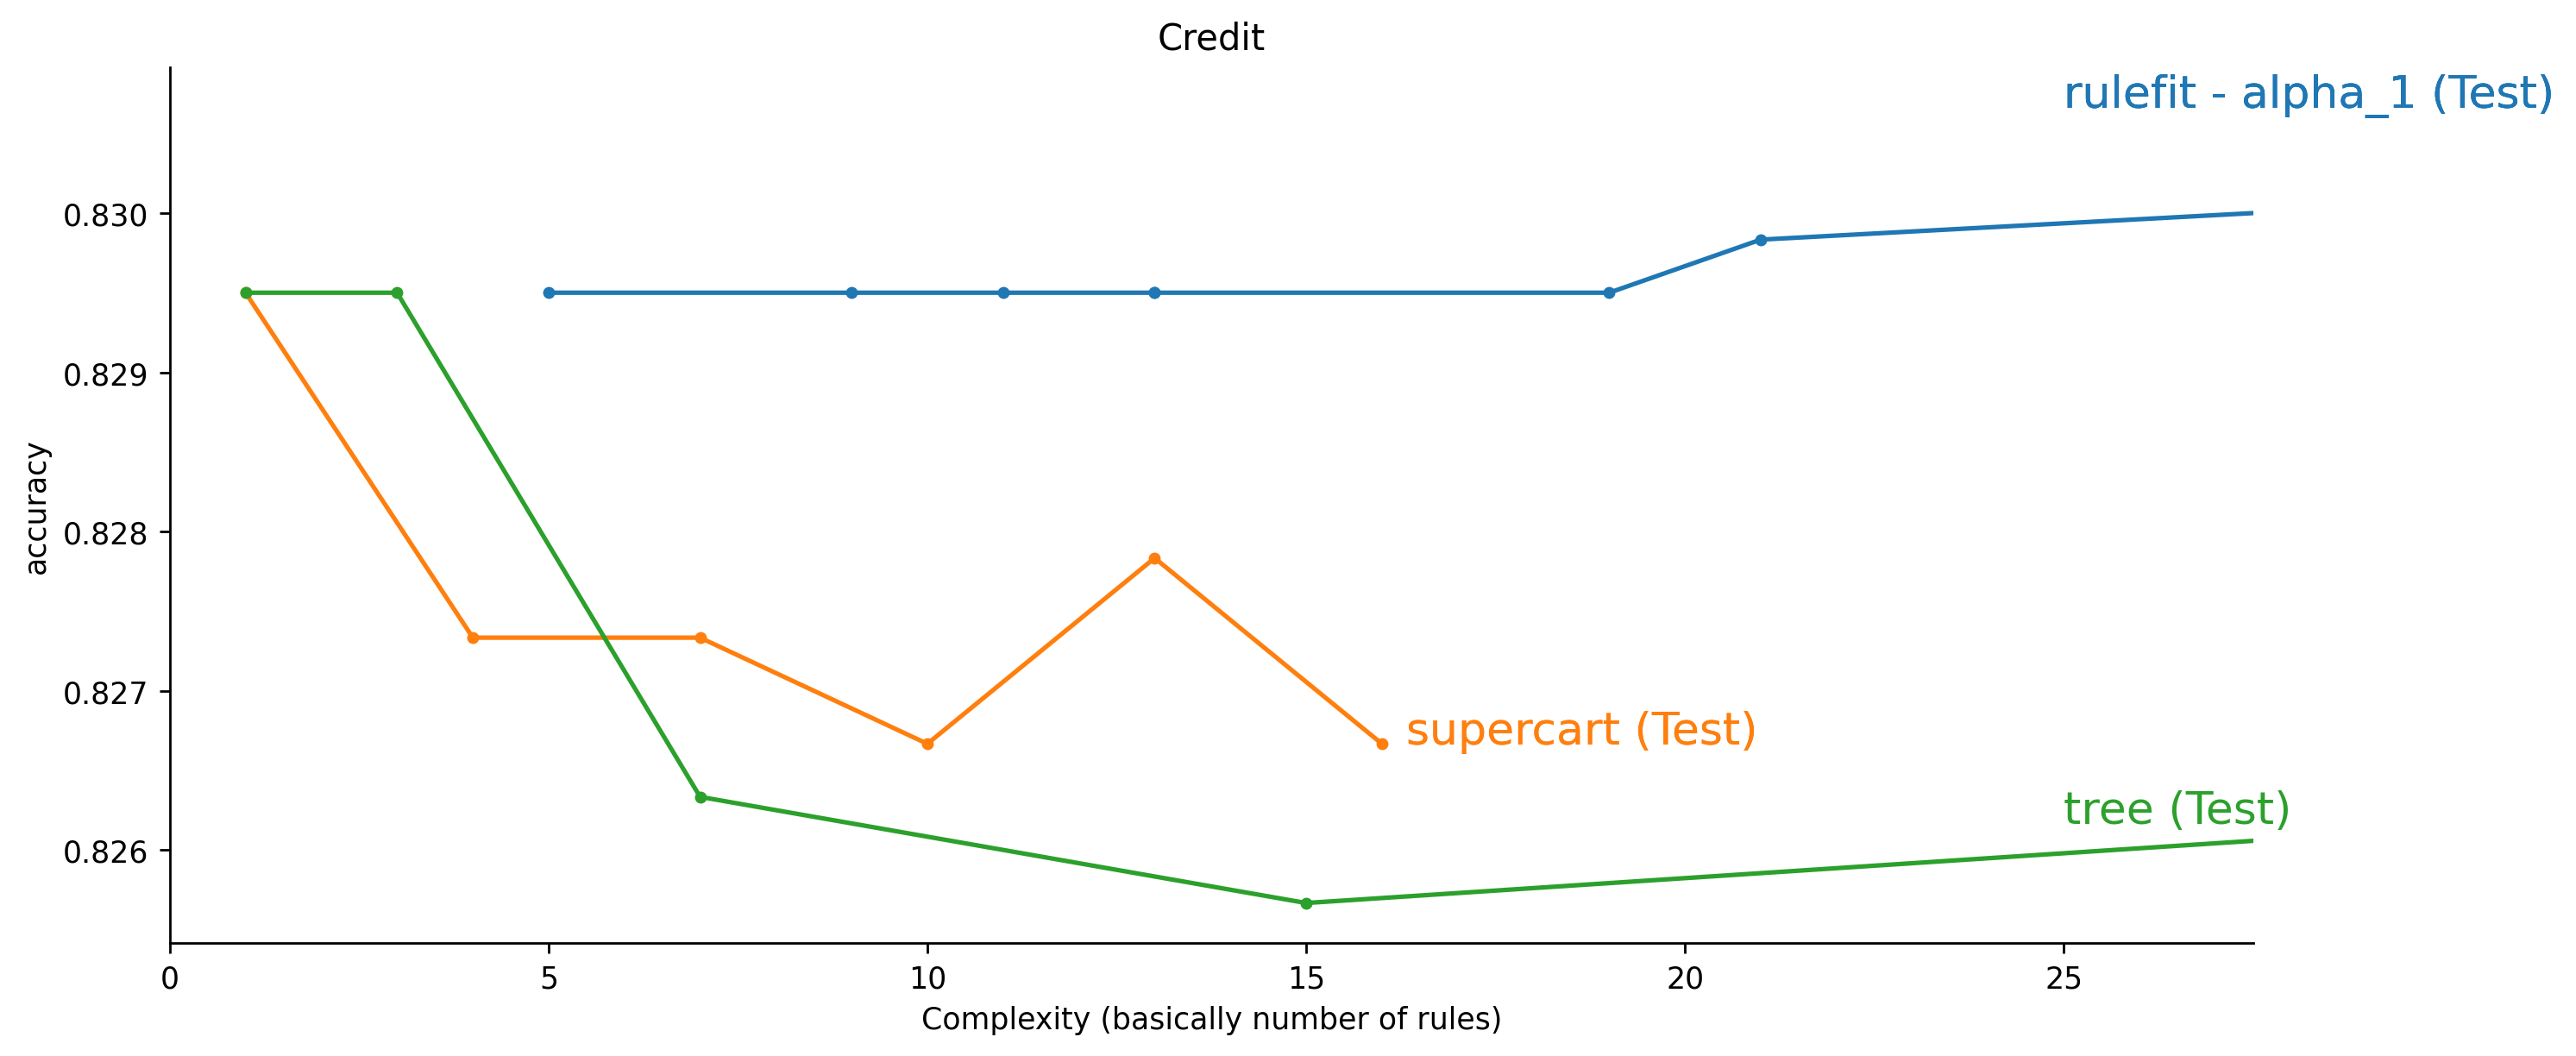

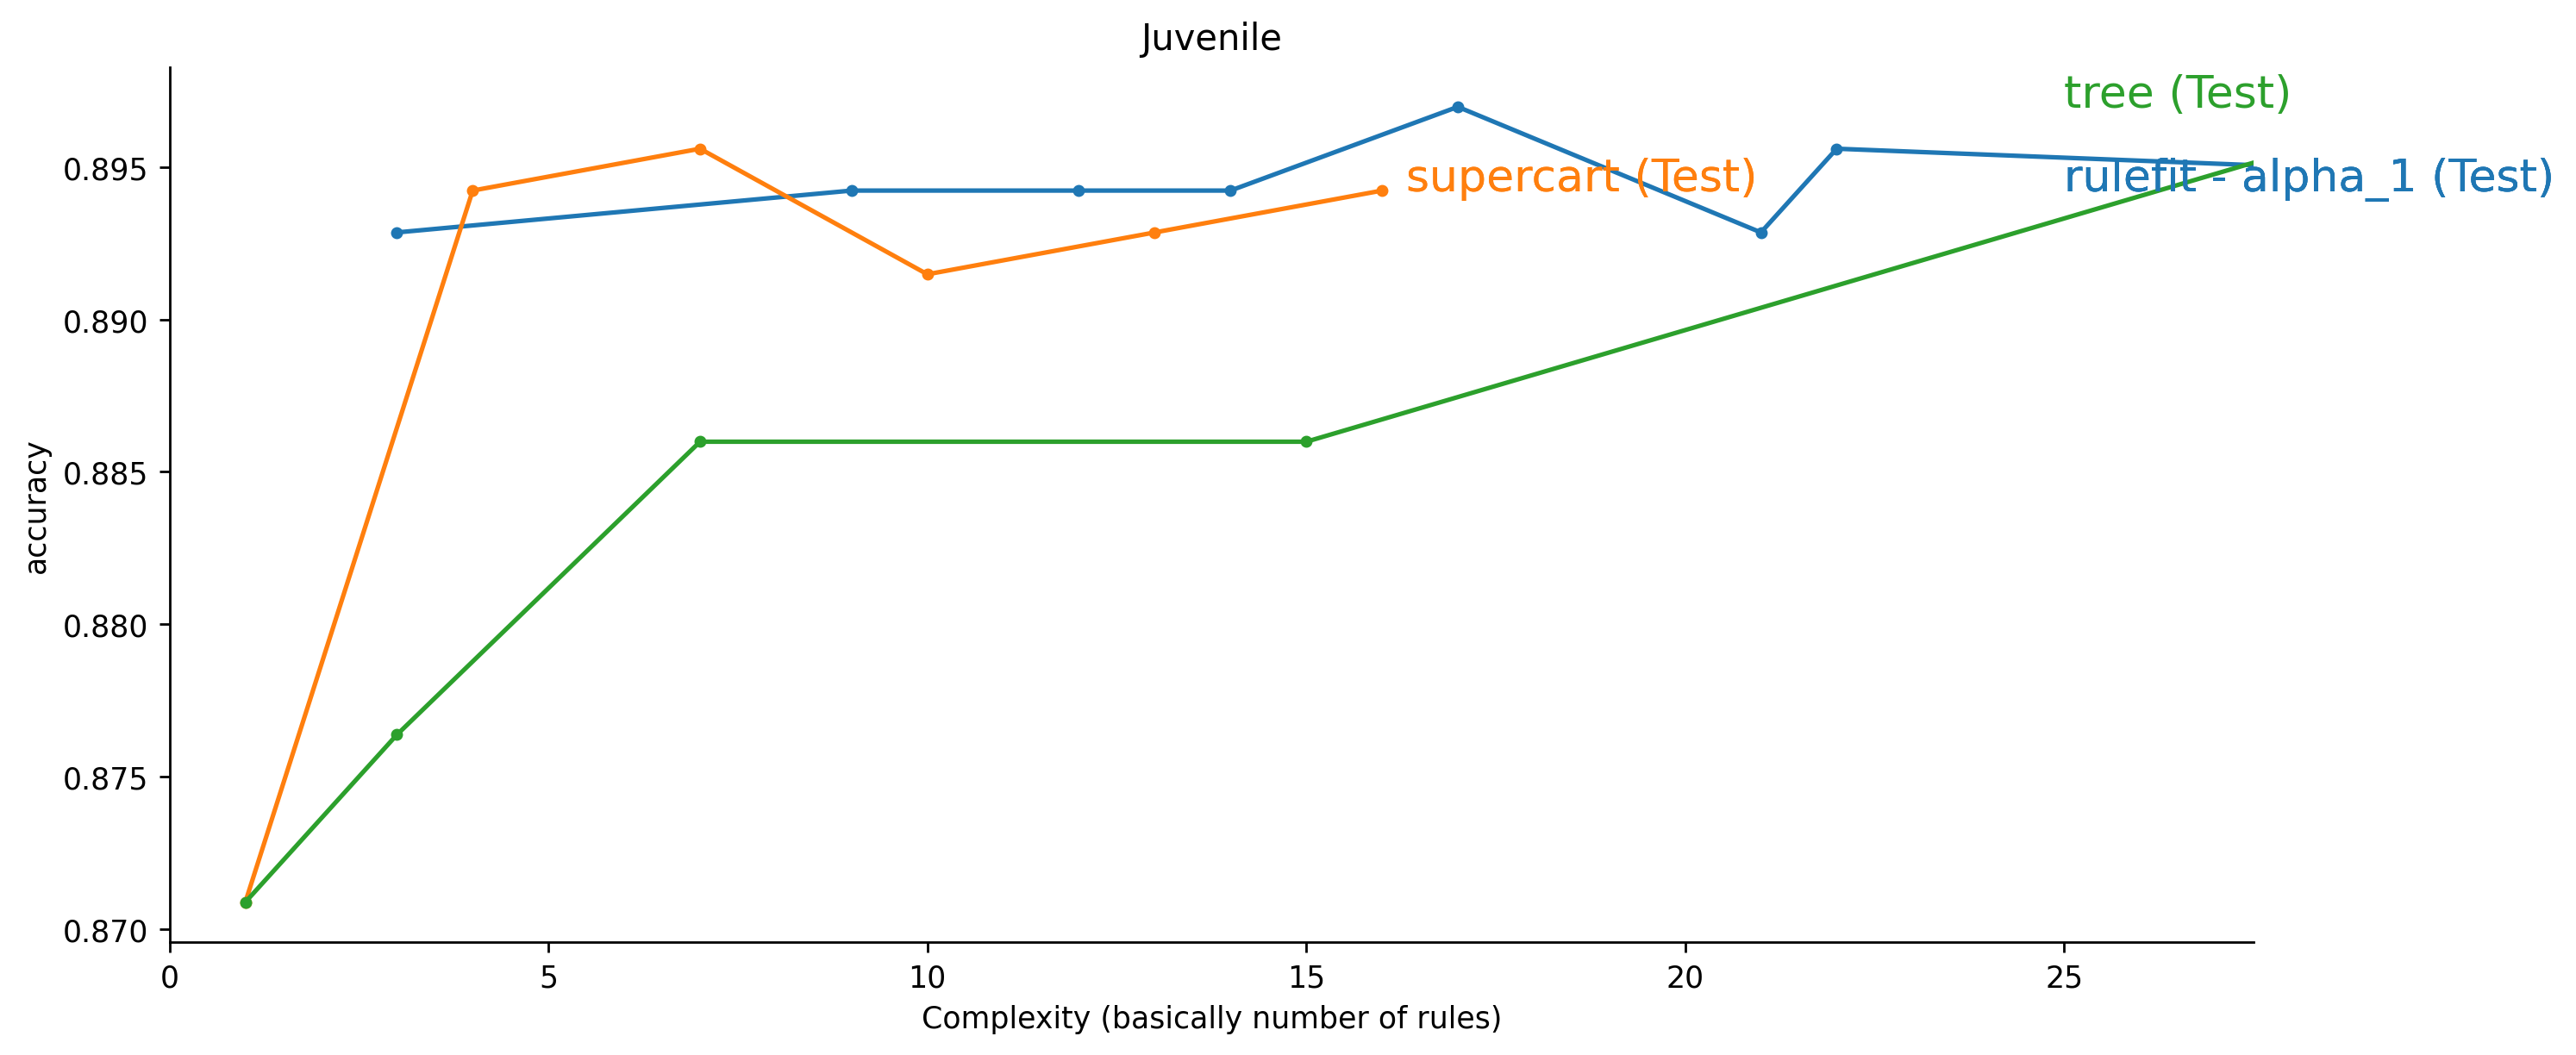

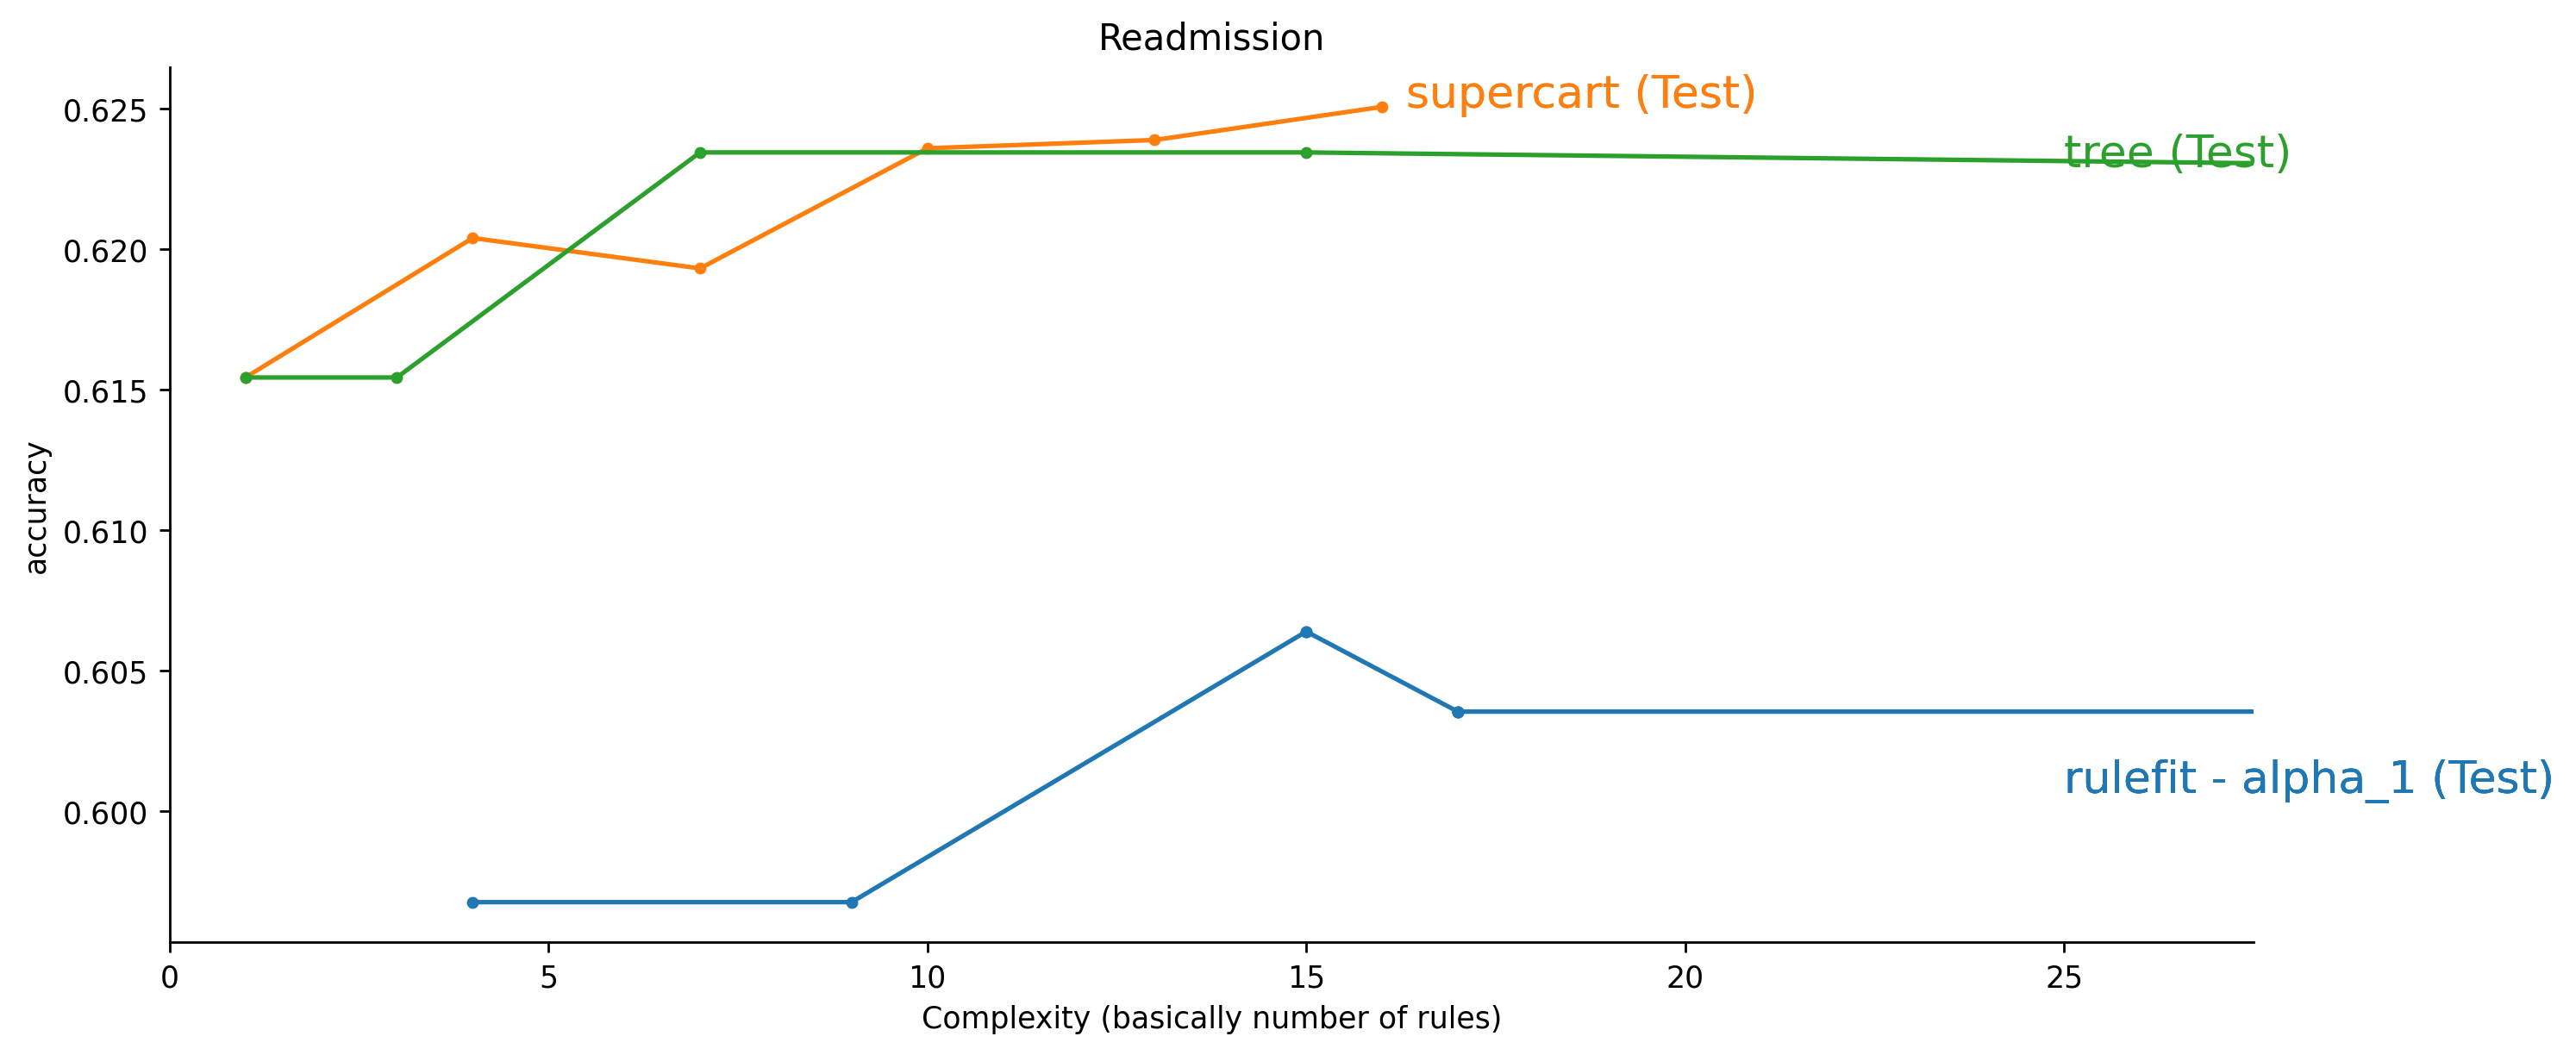

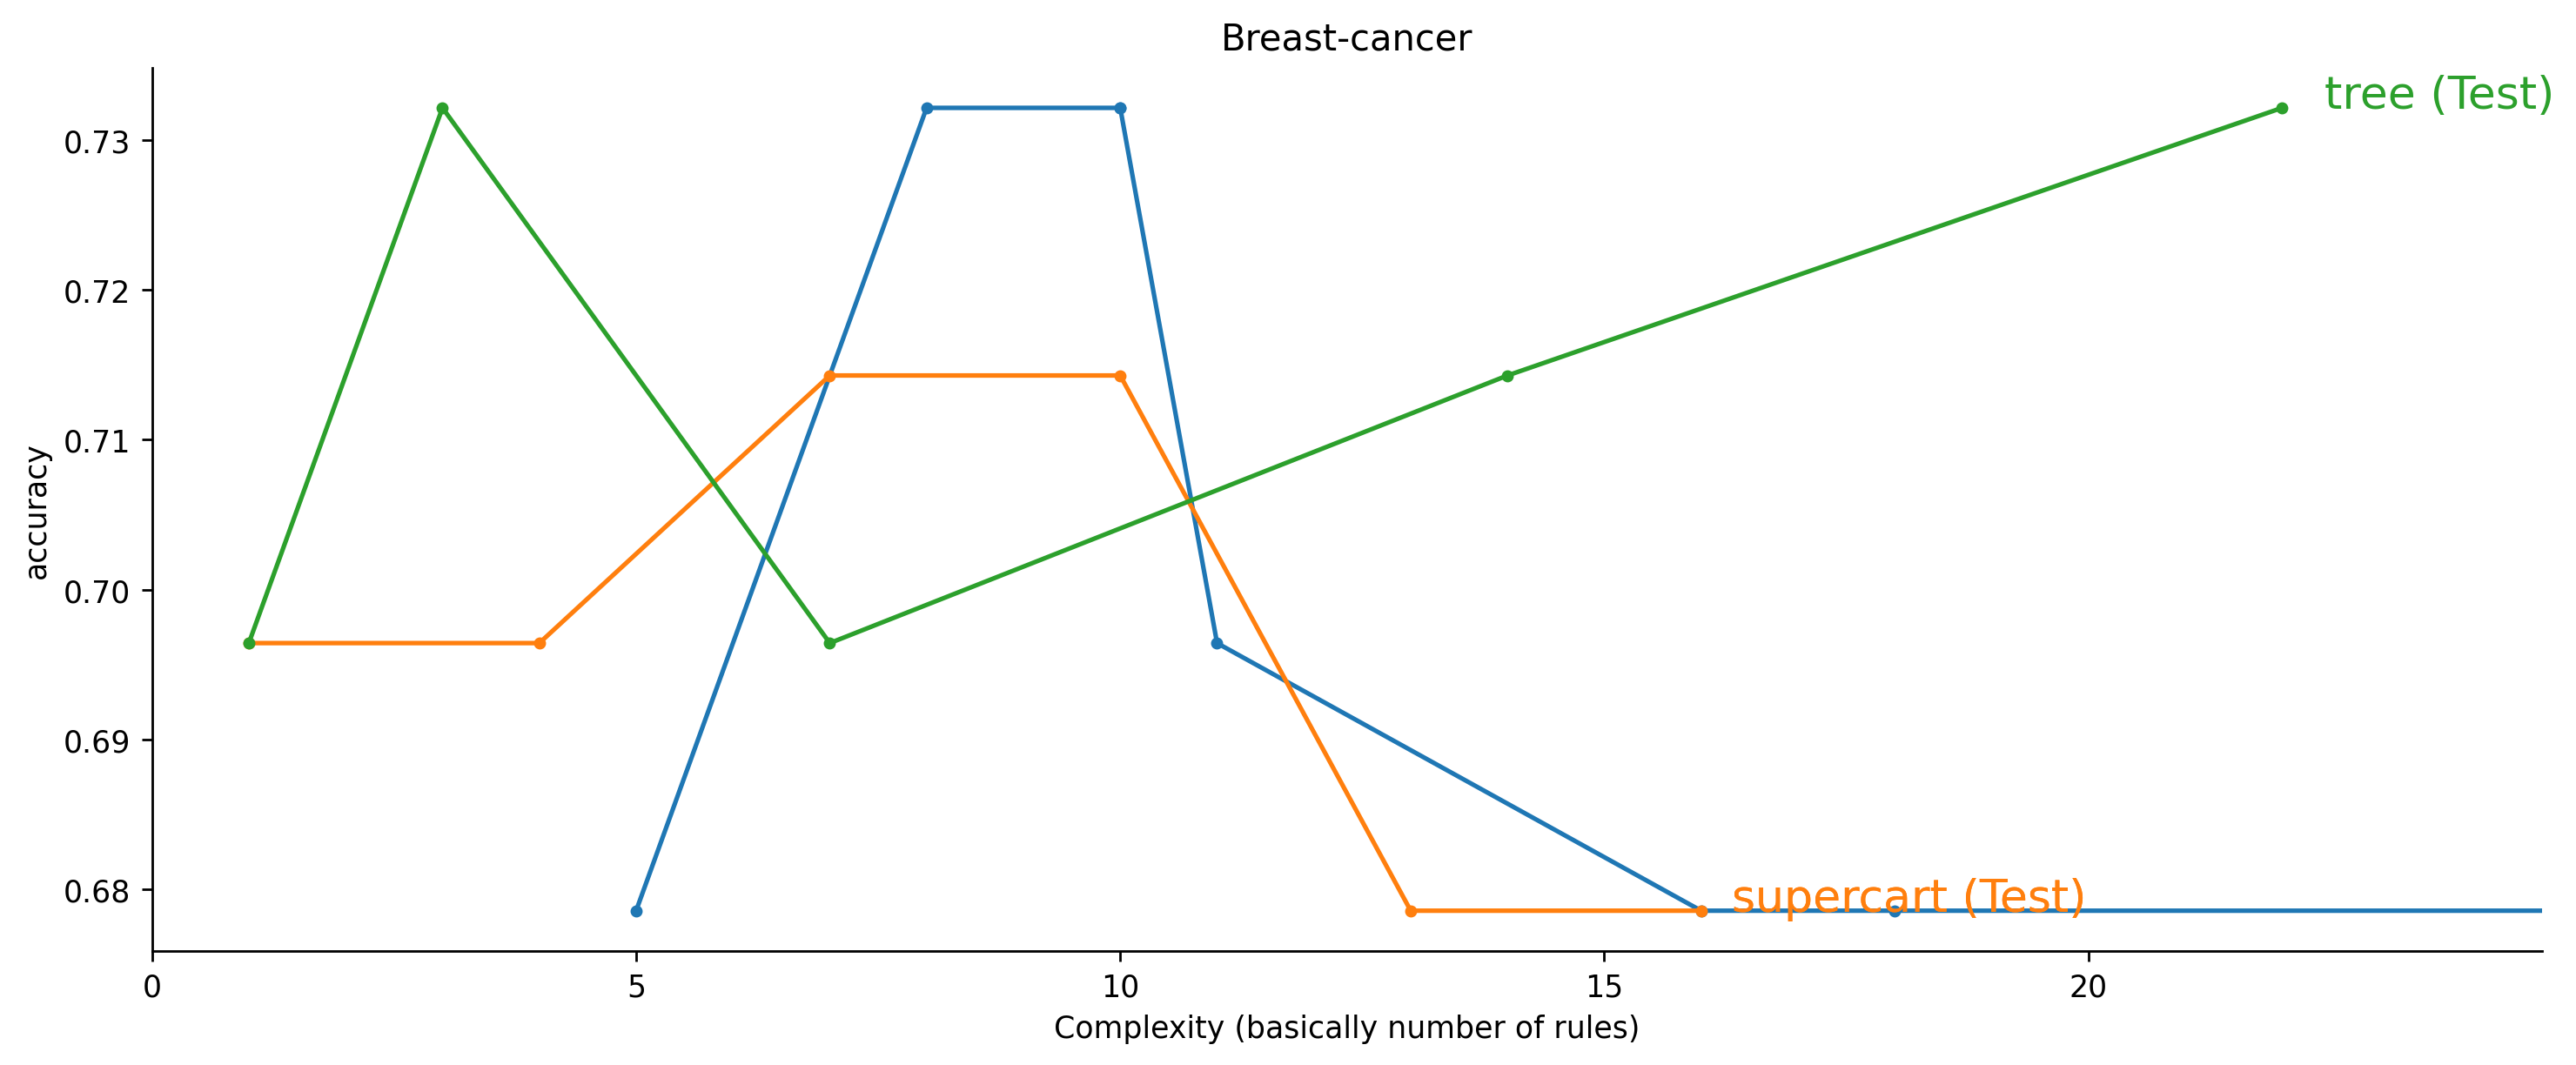

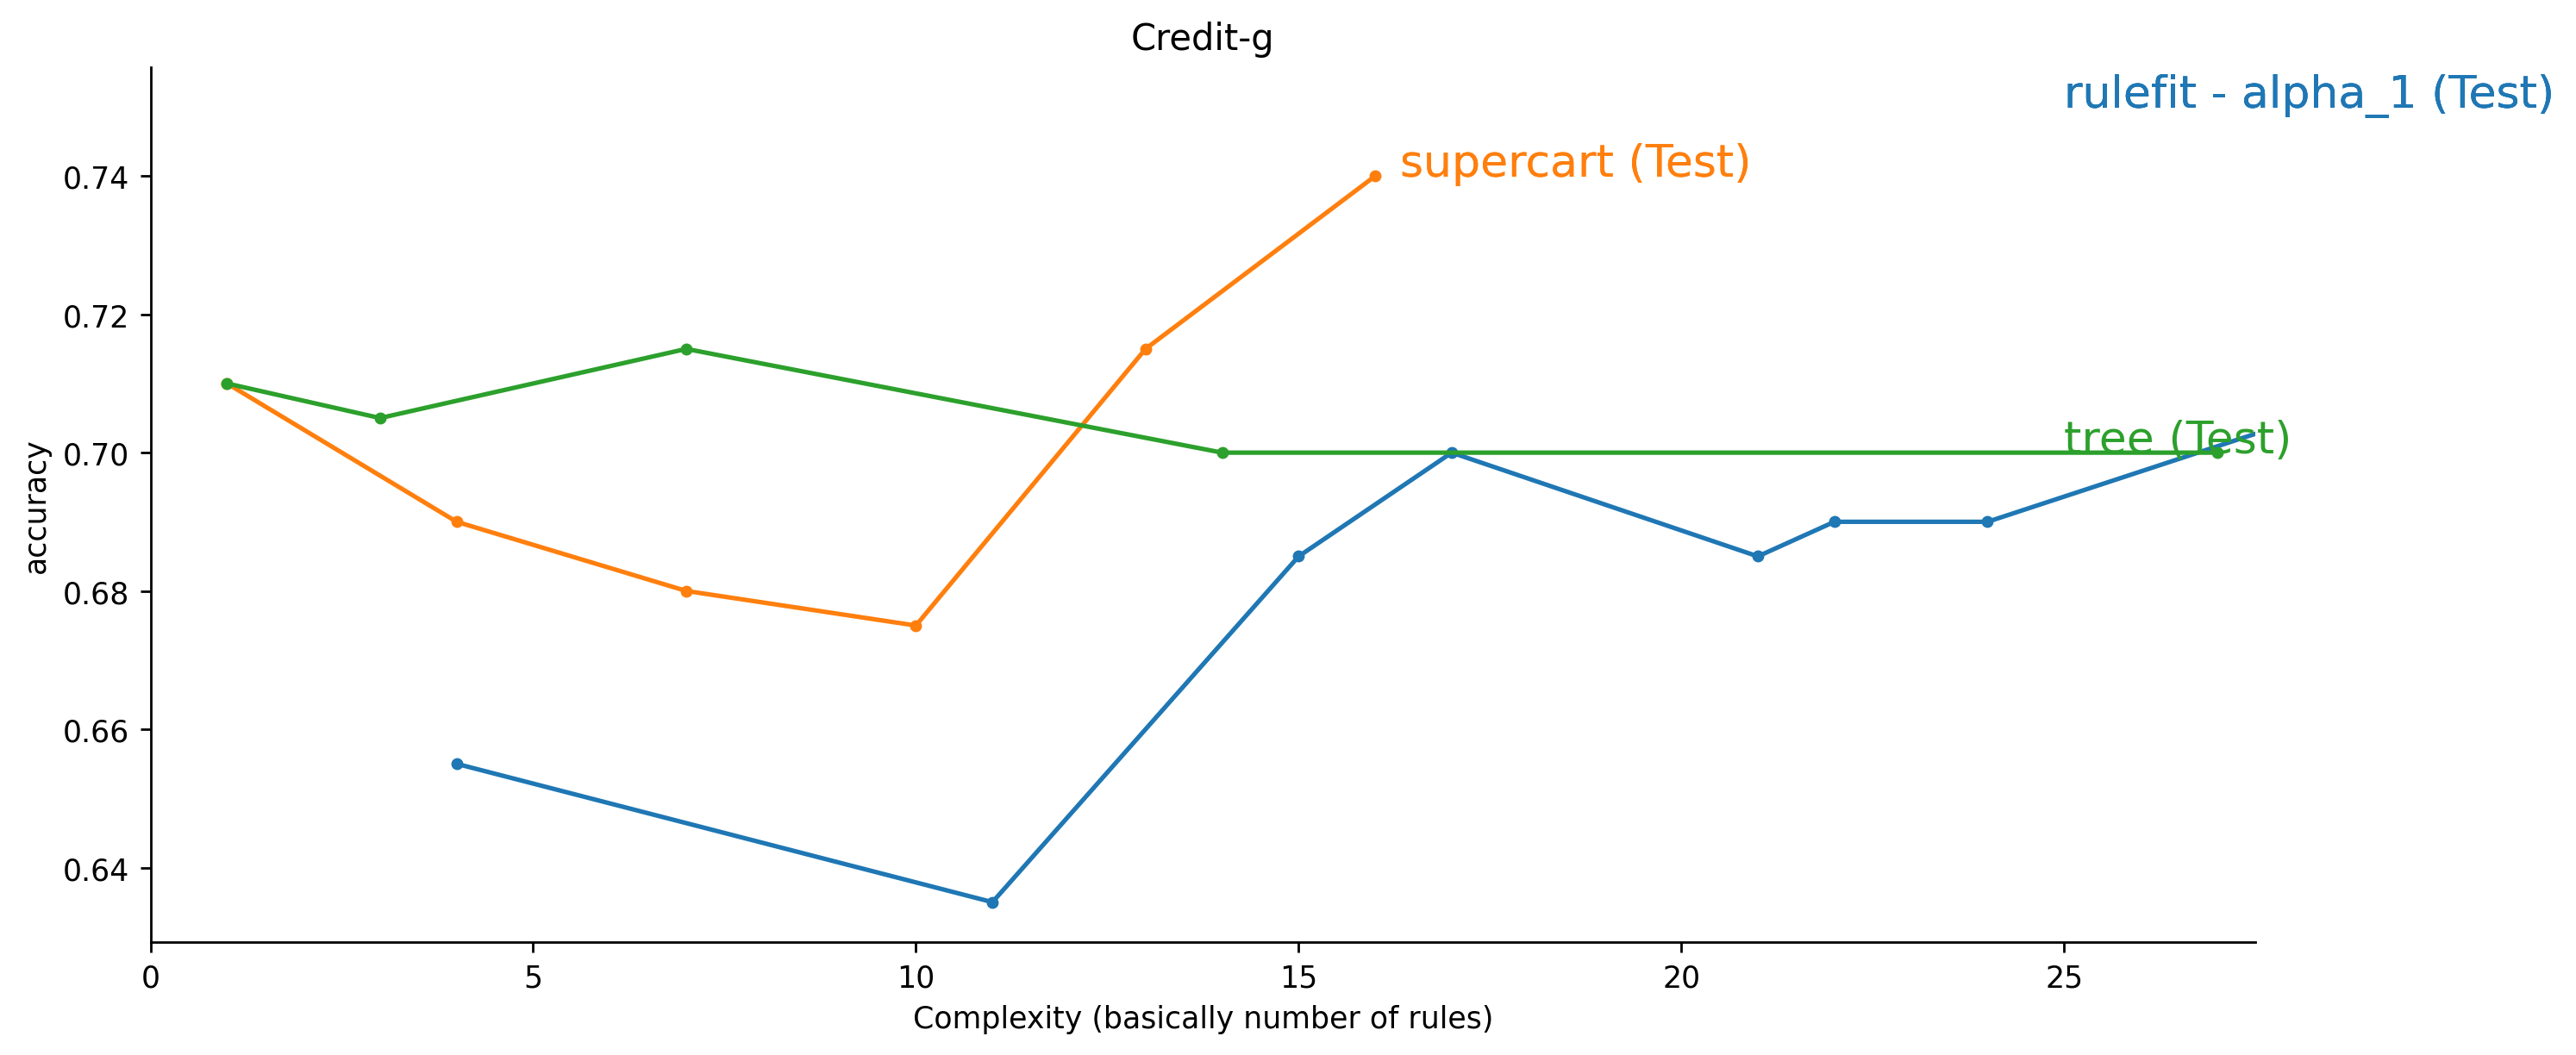

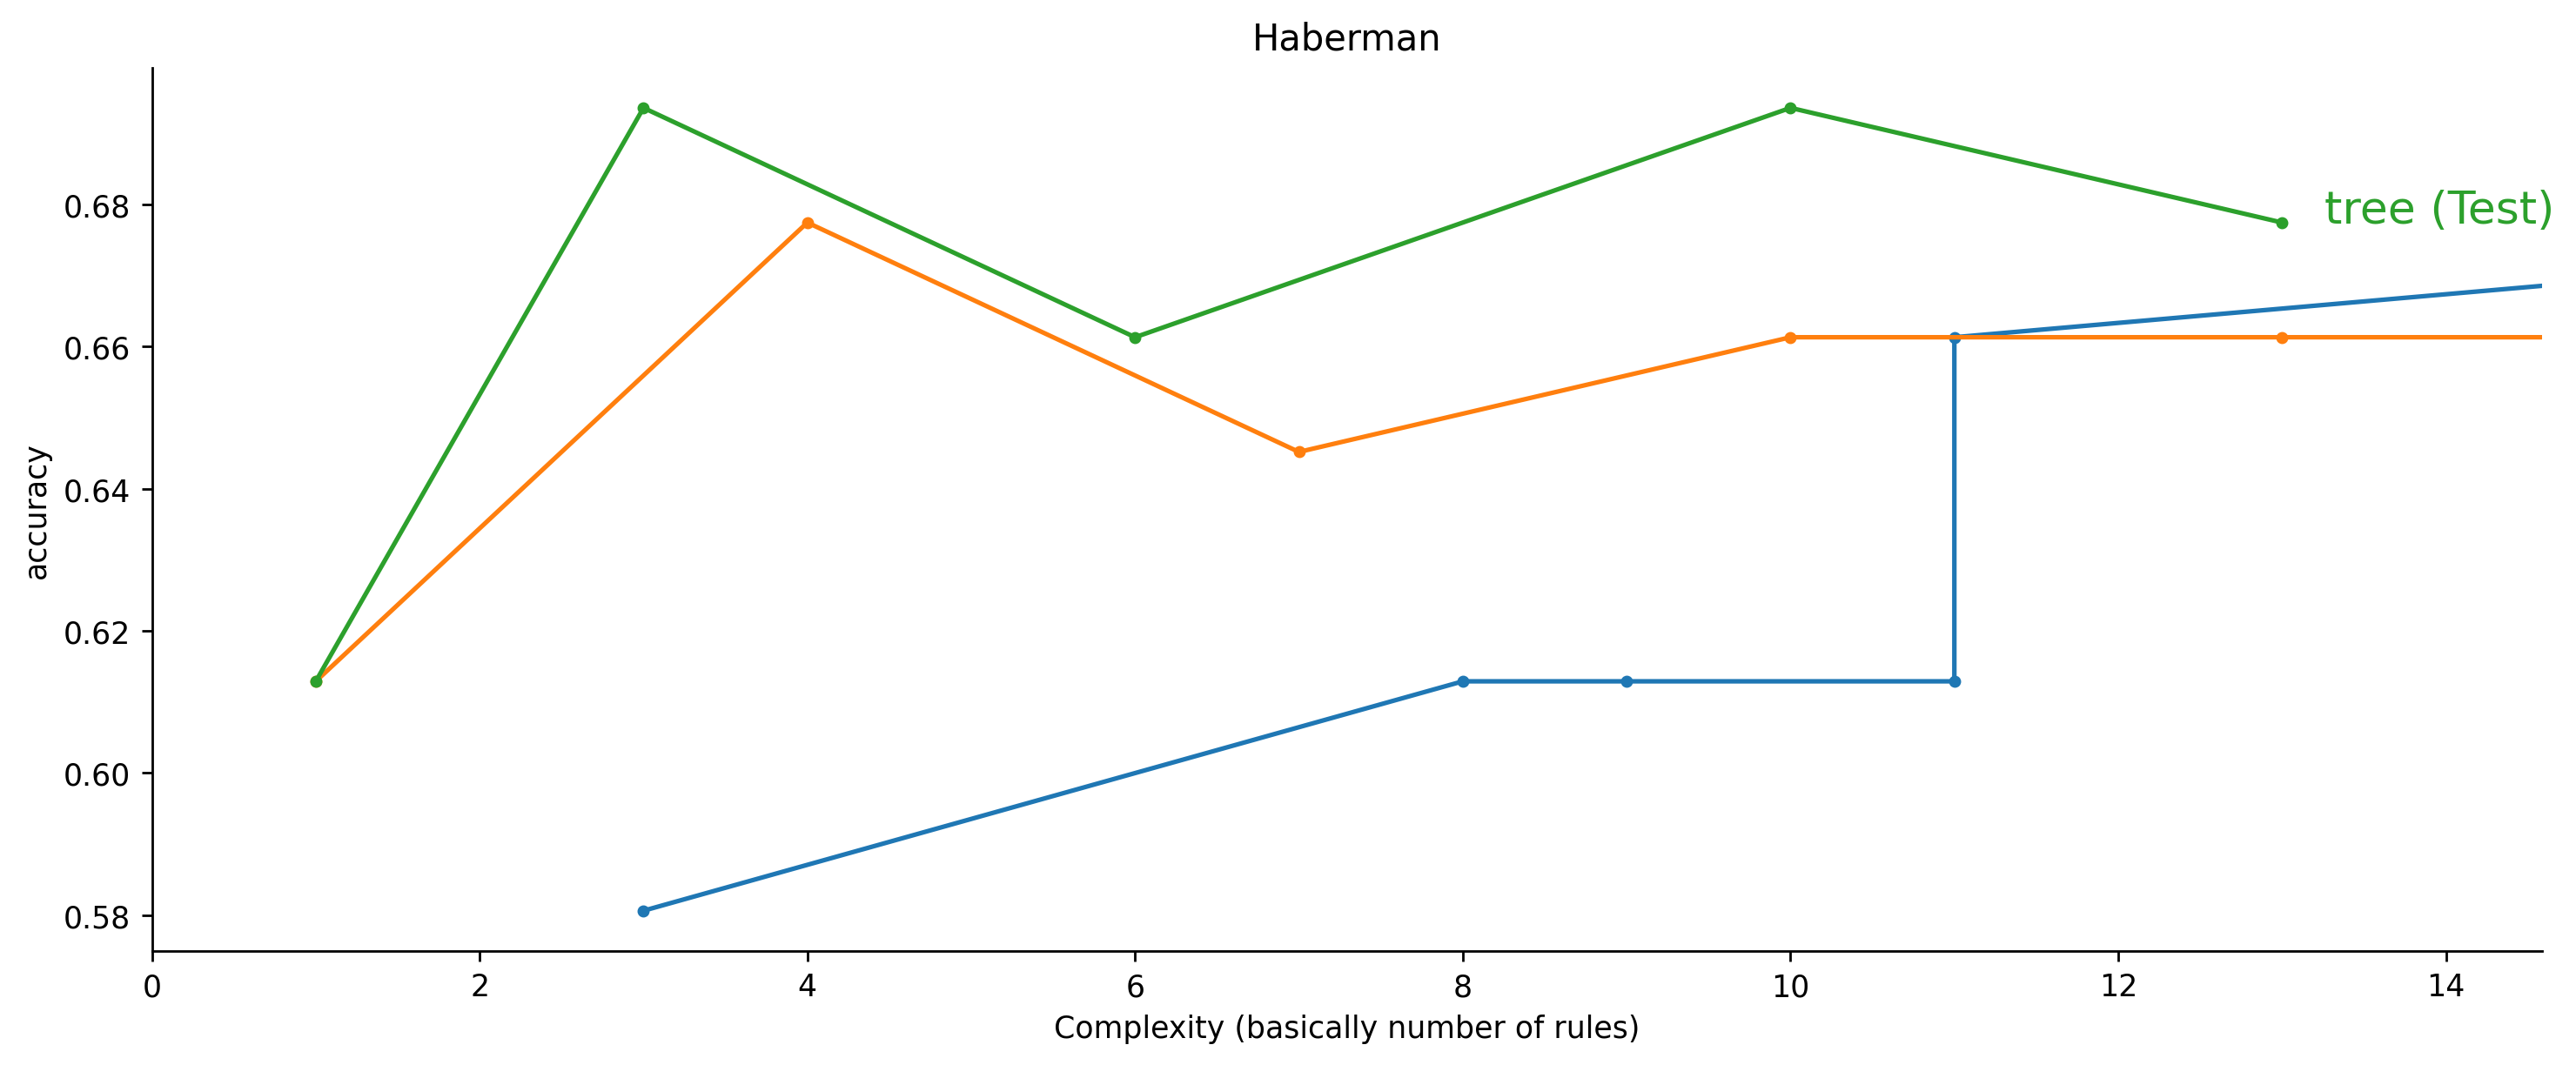

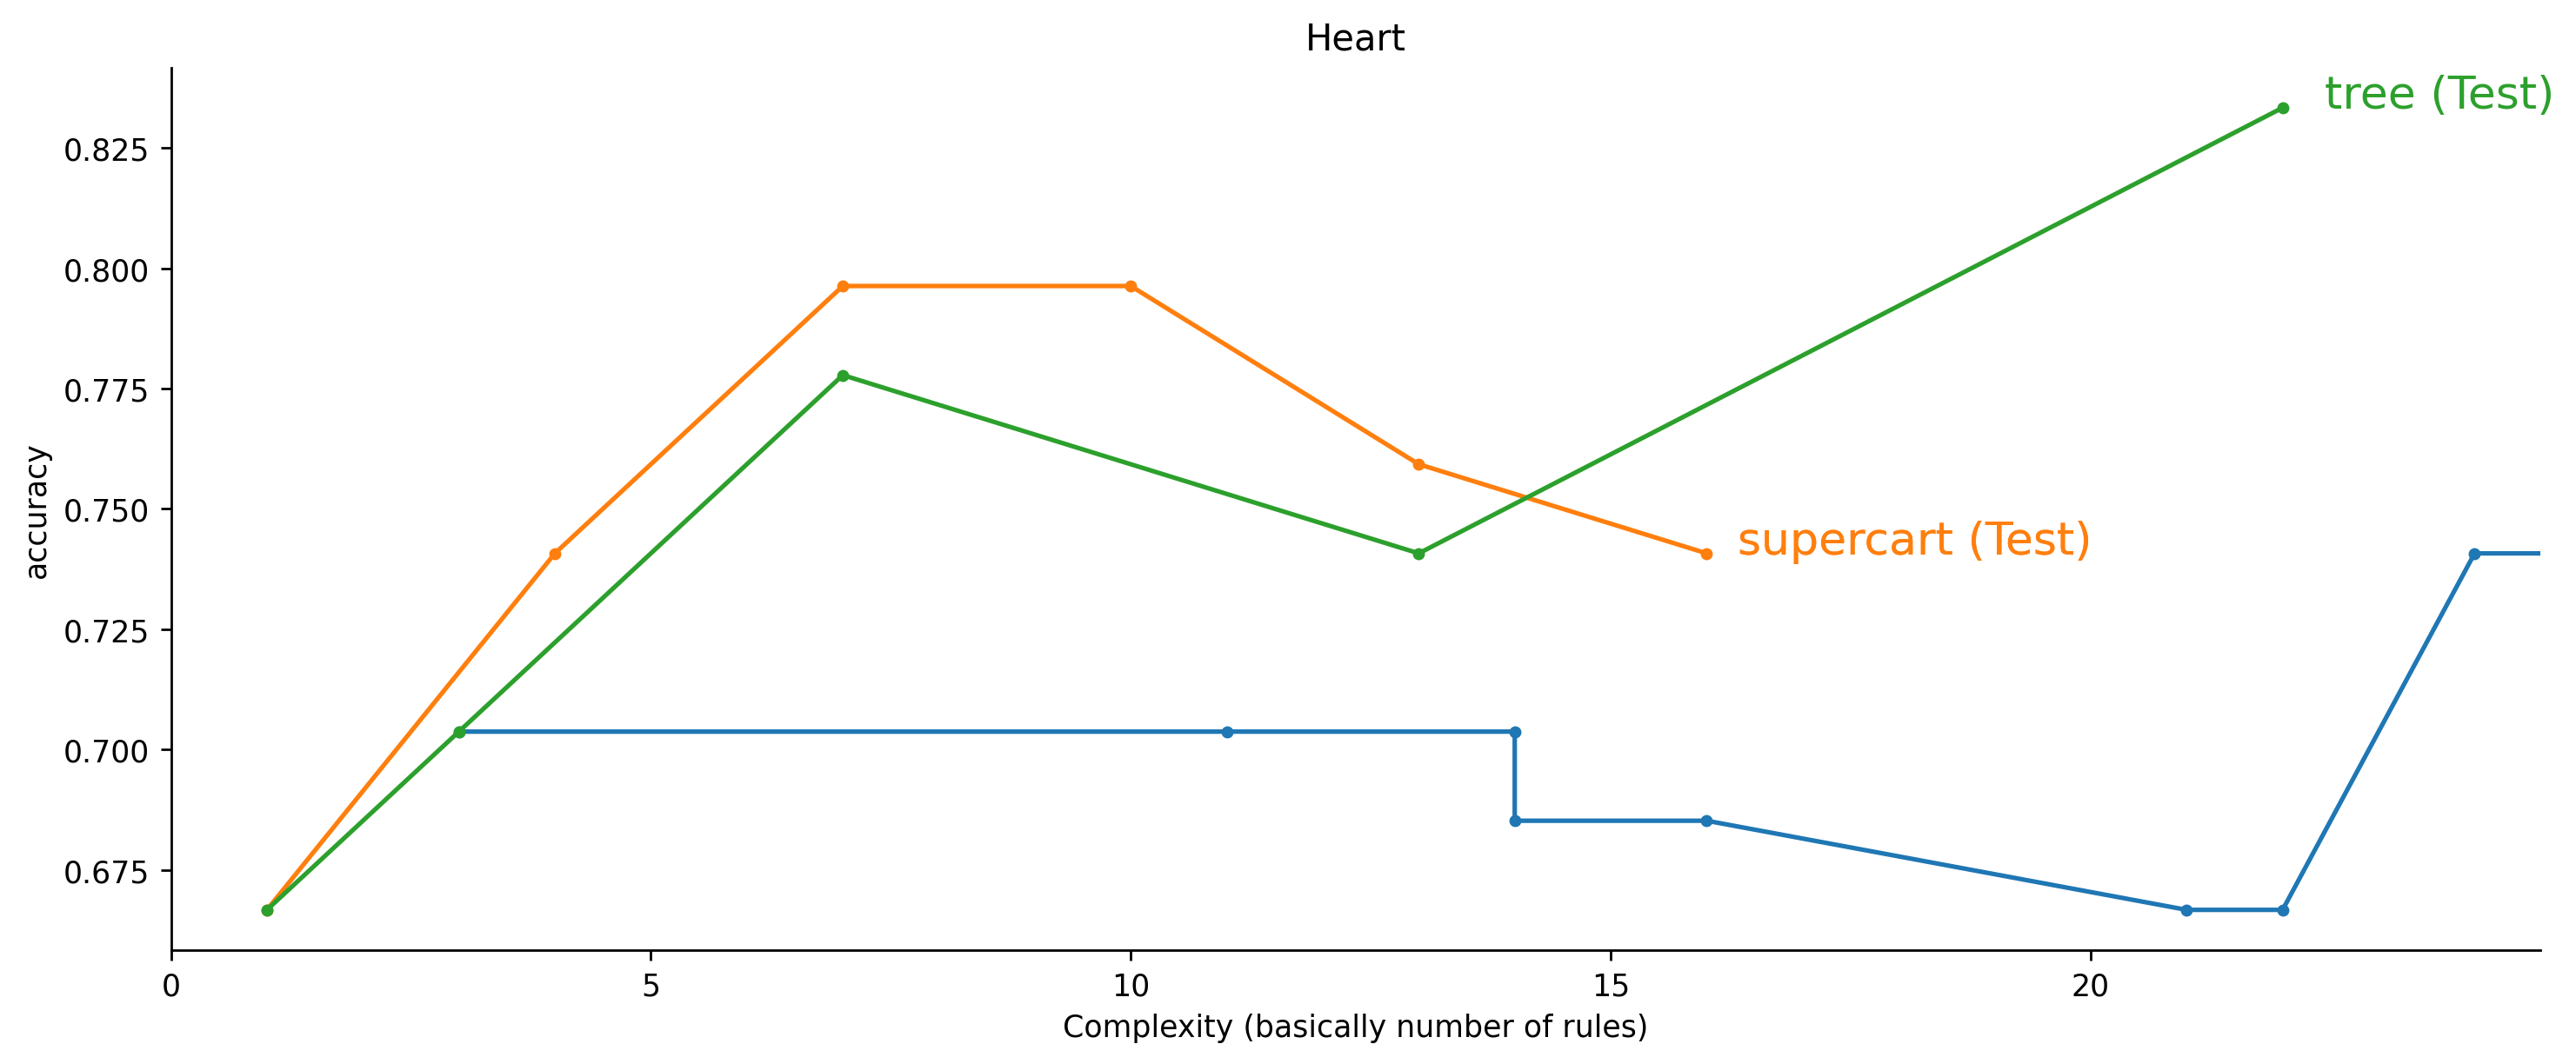

In [37]:
metric = 'accuracy'
for dset in DATASETS:
    dset_name = dset[0]
    pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
    df = pkl.load(open(pkl_file, 'rb'))['df']
    df['model'] = df.index
    
#     print(list(df.keys()))
    plt.figure(figsize=(12, 5))
    R, C = 1, 2
    for i, (name, g) in enumerate(df.groupby('model')):
        args = np.argsort(g[f'{dset_name}_complexity'])
        plt.title(dset_name.capitalize())
        kwargs = dict(color=colors[i])
        plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs, label=name + ' (Test)')
#         plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs, label=name + ' (Train)')
        plt.xlabel('Complexity (basically number of rules)')
        plt.xlim((0, 25))
        plt.ylabel('accuracy')
        dvu.line_legend()